## Análisis de Datos (Bivariante): Solo categóricas

Es hora de ver si existe alguna relación entre las columnas o variables de nuestro dataset, relación que puede no existir (variables independientes), existir e indicar que las variables cambian más o menos al mismo tiempo (pero no necesariamente en el mismo sentido), situación que llamaremos correlación, y finalmente que haya una relación de cuasalidad (cuando una cambia conlleva que otra cambie como consecuencia de esto)

En esta sesión en nos vamos a centrar en el análisis de relación entre dos variables categóricas.

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from bootcampviztools import plot_categorical_numerical_relationship, plot_combined_graphs, \
    pinta_distribucion_categoricas, plot_grouped_boxplots, plot_grouped_histograms, plot_categorical_relationship_fin, \
    grafico_dispersion_con_correlacion # Este módulo lo tienes en el directorio de los notebooks, puede abrirlo y jugar con las funciones que contiene


df_seguros = pd.read_csv("./data/Marketing-Customer-Analysis.csv")
df_air_jun = pd.read_csv("./data/dataset_viajes_jun23.csv")

*ANTES DE EMPEZAR: Las gráficas que vamos a emplear son sugerencias sencillas para hacer casi cualquier análisis pero sin duda puede que te resulte útil algún tipo de visualización para el análisis, por eso este [SITIO CURRADISIMO](https://www.data-to-viz.com/) puede ayudarte. Volveremos a él en el sprint de visualización*

#### Caso 1. Seguros: Bivariante response-state

Nos han pedido que estudiemos la respuesta a las campañas de marketing según la demografía por eso un conjunto de analisis que tenemos que hacer sí o sí es el de la variable/columna `response` con todas las que consideremos demográficas, por ejeplo: `state`, `education`,`marital_status`,`gender`,`eploymentstatus`. Nosotros vamos a hacer el análisis de relación con `state` como ejemplo.

**#1  Comparar sus frecuencias** tal como las obtuvimos en el univariante

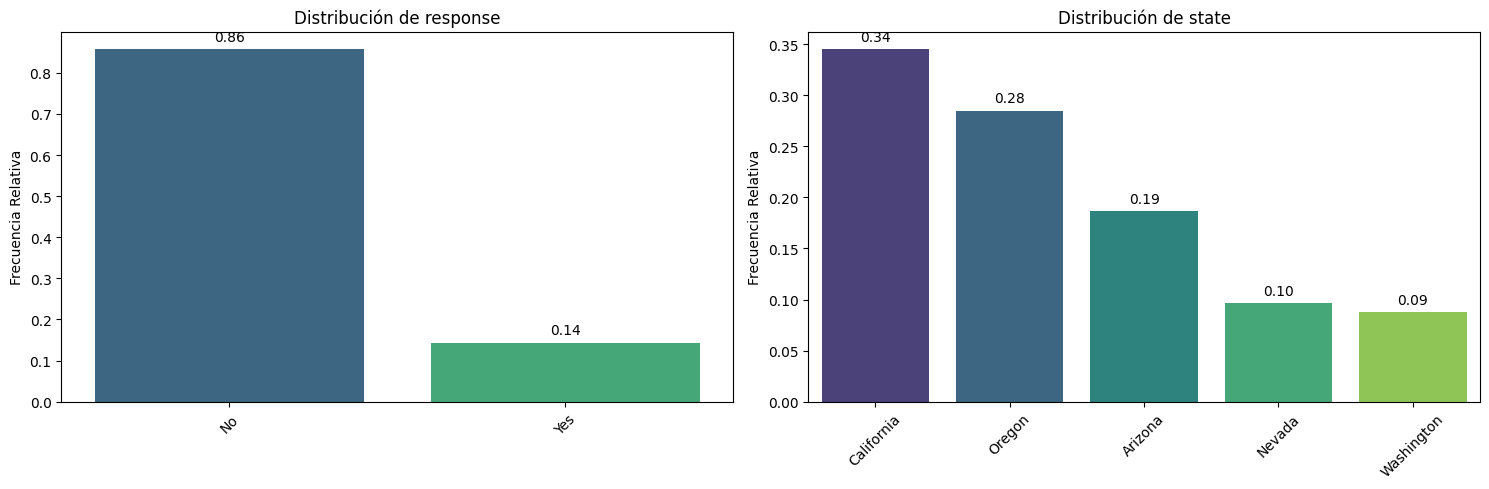

In [50]:
pinta_distribucion_categoricas(df_seguros,["response","state"], relativa= True, mostrar_valores= True)

Así, antes de "combinarlas", lo que espero es que, si no hay interacción o relación entre ellas. En concreto, como "response" es la variable directora, es la que quiero ver en función de la otra, y por tanto lo que yo quiero ver es si hay variación de la distribución de "YES"/"NO" por estado. Por eso mira como lo muestro:

**#2 Haz la comparación con la variable más importante como directora** es decir que sea la de la "leyenda", en nuestro caso es ponerla en la función la segunda

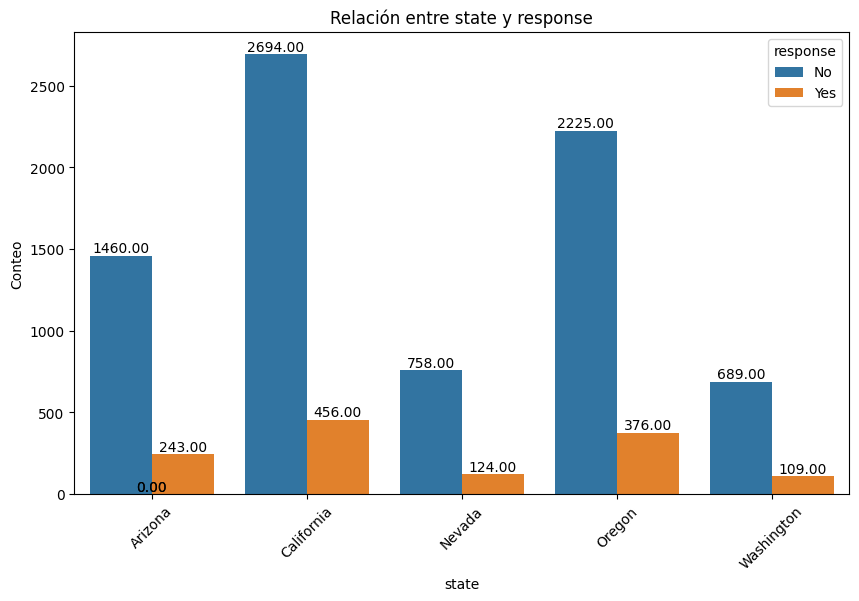

In [51]:
plot_categorical_relationship_fin(df_seguros, "state","response", show_values= True)

Parece que sí, que las respuestas se distribuyen igual independientemente del estado, pero sería mejor verlo con algunos números quizás, y además no en frecuencia absoluta sino en relativa. Juguemos con nuestra función:


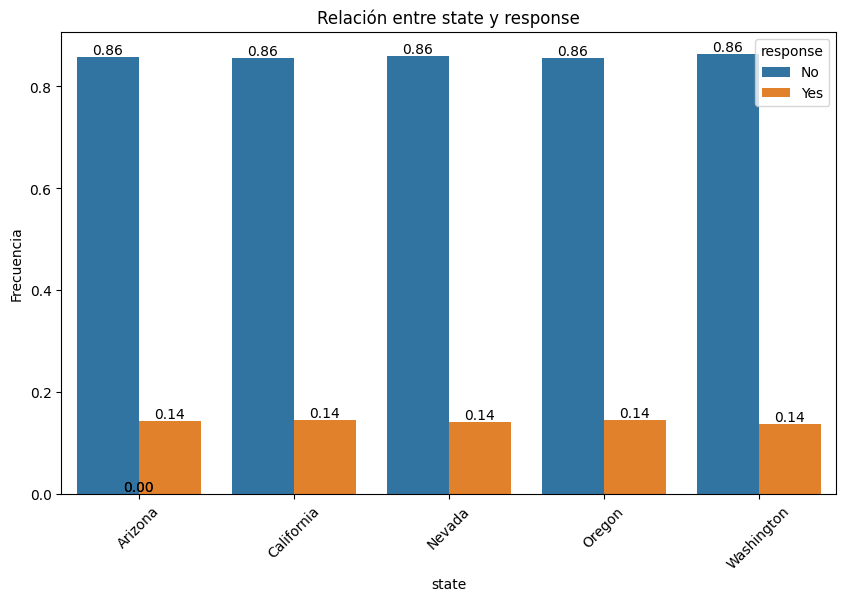

In [52]:
plot_categorical_relationship_fin(df_seguros, "state","response", relative_freq = True, show_values = True)

Pues guau, está claro que no hay relación entre una y otra (clava en cada estado la medida general). Esto ya sí es un buen resultado para mi análisis, si quiero mejorar la respuesta de mis campañas no hay un estado que me sirva de ejemplo, pero también me dice que no es algo que dependa del lugar de residencia de mis clientes. 

In [53]:
# En números, por si no te crees el gráfico
df_seguros.groupby("state", as_index = False)["response"].value_counts(normalize = True)

,state,response,proportion
0,Arizona,No,0.857311
1,Arizona,Yes,0.142689
2,California,No,0.855238
3,California,Yes,0.144762
4,Nevada,No,0.859410
5,Nevada,Yes,0.140590
6,Oregon,No,0.855440
7,Oregon,Yes,0.144560
8,Washington,No,0.863409
9,Washington,Yes,0.136591


Ahora sería el momento de seguir aplicándolo al resto de categóricas demográficas. Y luego con las otras que nos pidieron ver si había relación por ejemplo con el tipo de oferta. Vamos a ver esa antes de pasar al caso de los viajes.

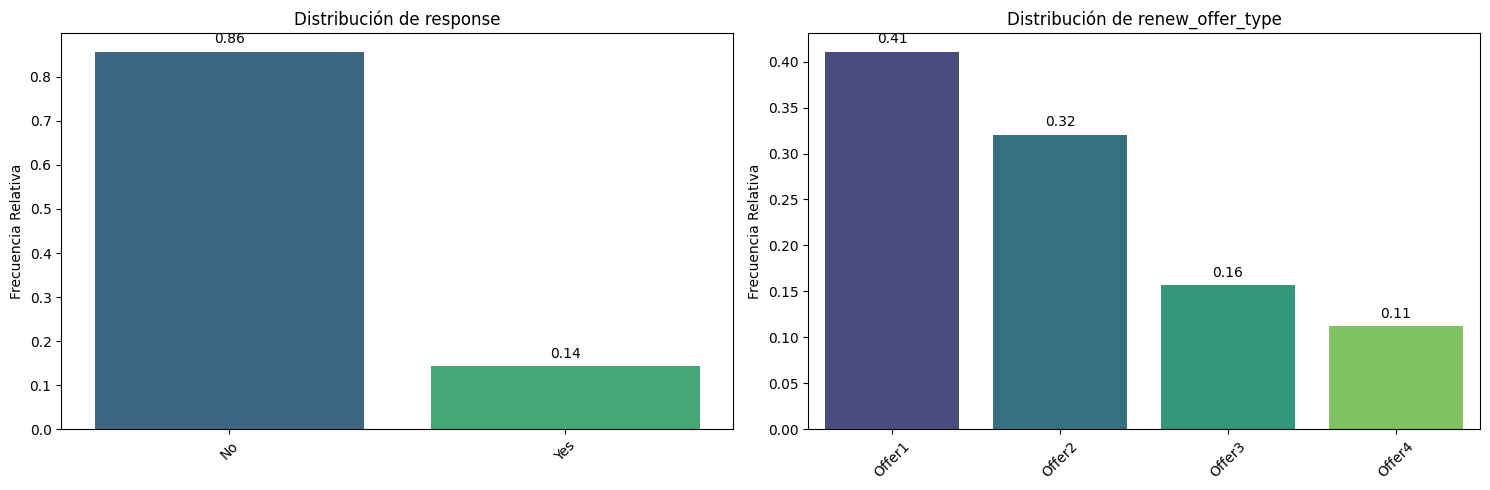

In [54]:
pinta_distribucion_categoricas(df_seguros,["response","renew_offer_type"], relativa= True, mostrar_valores= True)

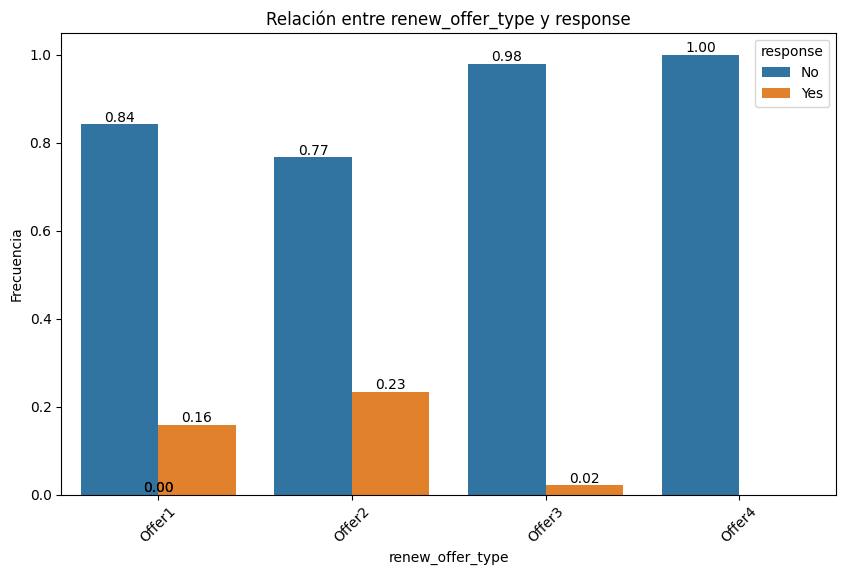

In [55]:
plot_categorical_relationship_fin(df_seguros, "renew_offer_type","response", relative_freq = True, show_values = True)

Aquí la cosa cambia y cuánto. Hay bastante que cortar aquí:
* La oferta1 tiene la tasa similar a la global y además parece que arrastra al resto por eso porque es esa tasa global.
* La oferta2 es claramente una gran oferta en terminos comparativos. ¿Podríamos hacer la oferta 2 todo el tiempo? ¿Qué beneficio tiene?¿Está dirigida a todo el público? (Salen más preguntas, pero porque este hallazgo es interesante)
* Las ofertas 3 y 4 probablemente habría que desecharlas o bien remodelarlas completamente.

### Caso 2. Viajes: Bivariante aircompany-destino

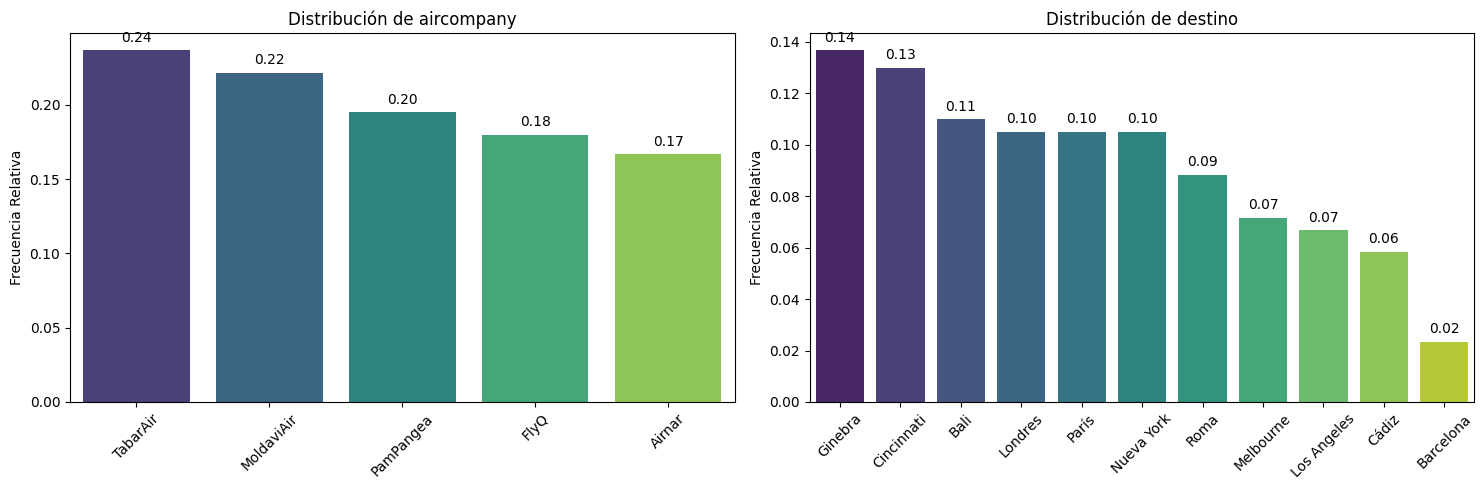

In [56]:
pinta_distribucion_categoricas(df_air_jun,["aircompany","destino"], relativa= True, mostrar_valores= True)

Considero Aircompany como la variable directora, porque en realidad desde Tabarair lo que estamos haciendo es una análisis competitivo, si lo pensamos un poco:

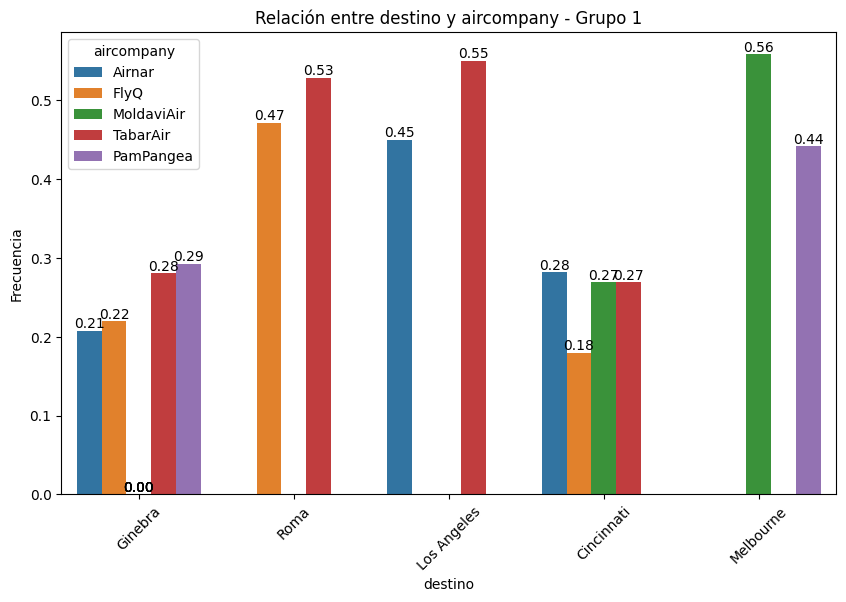

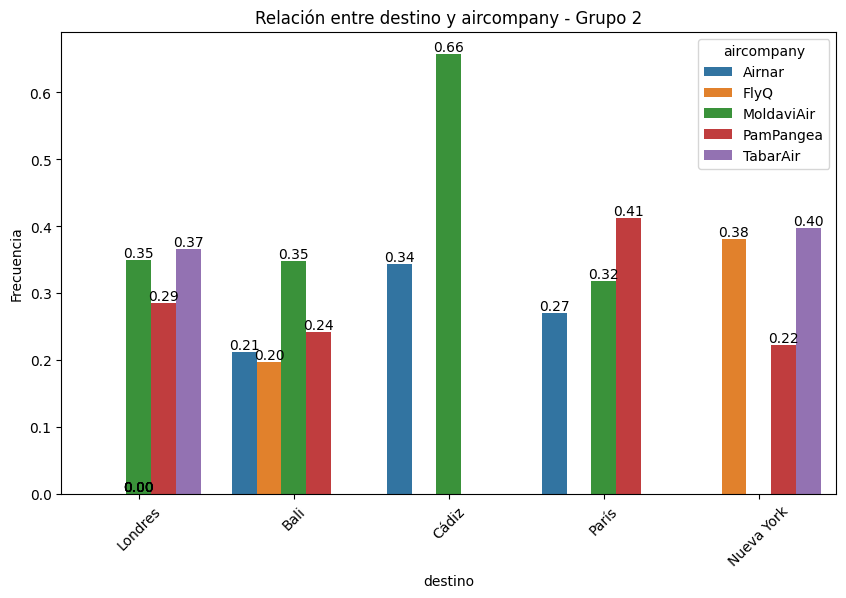

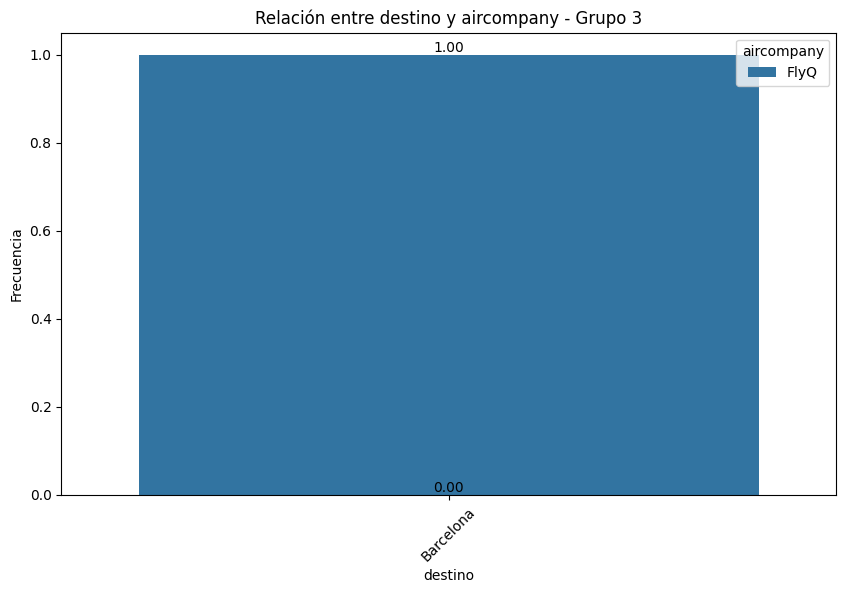

In [57]:
plot_categorical_relationship_fin(df_air_jun, "destino","aircompany", relative_freq = True, show_values = True)

Aunque es mucha información seguro que ya has visto por lo menos un punto interesante, vamos que sobresale y que indica que por lo menos deberíamos prestarle interés:
* A Barcelona solo vuelta FlyQ y si recuerdas Barcelona era un destino infraservido (era el destino con menos viajes), esto pinta a que tenemos otra pequeña perla: Hay que estudiar Barcelona, porque podría ser perfectamente un lugar de expansión.LookupError
* Cádiz, era el siguiente sitio infraservido y sólo hay dos compañías, podría ser también otro punto.
* Por otro lado se explica que Bali, Cincinnati y Ginebra sean las ciudades con más vuelos. Son las únicas con 4 compañías operando en ellas. Tabarair opera en dos de ellas. Quizá sea el momento de reducir los vuelos en esas ciuidades y aumentarlos en Barcelona, ¿se te ocurre como profundizar en esta hipótesis? (sin duda para mí esta sería una buena guía de trabajo para el análisis de estos datos)

### Siguientes Pasos

Pues ya has visto un ejemplo y una guía de como trabajar relaciones entre dos variables categóricas. Este estudio lo completaremos cuando estudiemos la correlación entre vairables categóricas. Ahora te dejo unos posibles pasos para enfrentarse al análisis bivarainte de variables categóricas:

1. Empieza por las categóricas directoras y comparalas con el resto de categóricas dos a dos.
2. Para ello muestra sus valores frecuenciales por separado.
3. Luego muestra sus valores frecuenciales combinados.
4. Analiza y aumenta tu saca de preguntas pero también empezarán los pequeñas perlas del análisis a aparecer.


## Análisis de Datos (Bivariante): Combinada categórica-numérica

### Caso 1. Seguros: Bivariante response-CLV

Pues no nos queda otra que analizar la relación de las variables target o directoras entre sí. Como antes, primero veamos sus valores por separado:

**#1**  Tener la referencia de la **distribución de valores por separado de cada variable**

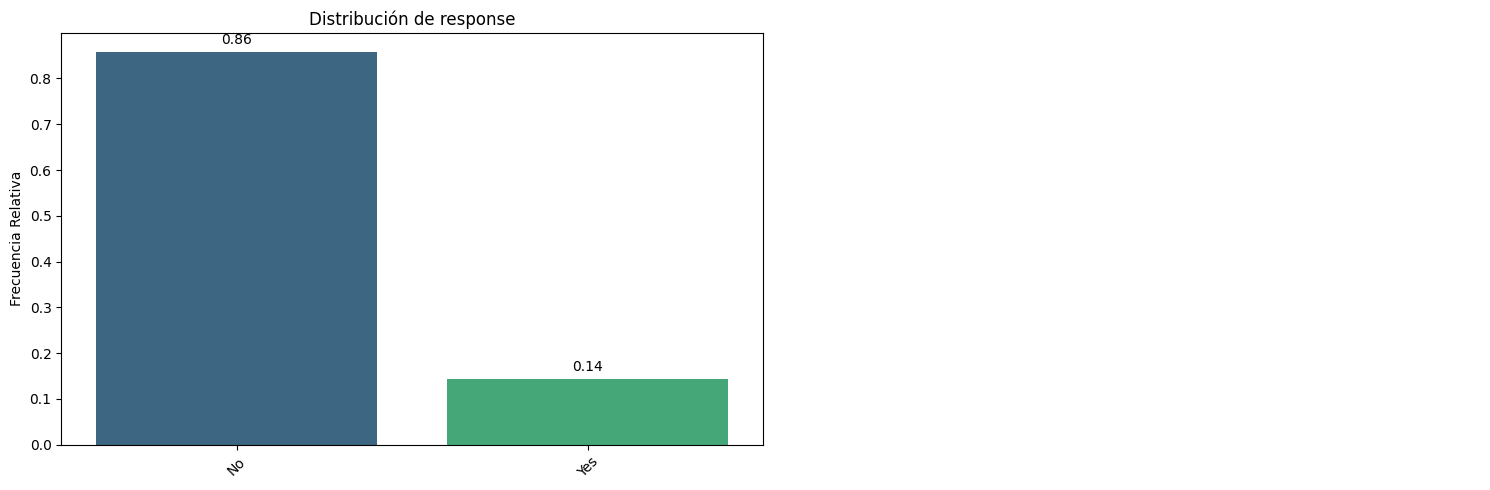

In [58]:
pinta_distribucion_categoricas(df_seguros,["response"], relativa= True, mostrar_valores= True)

(2,)


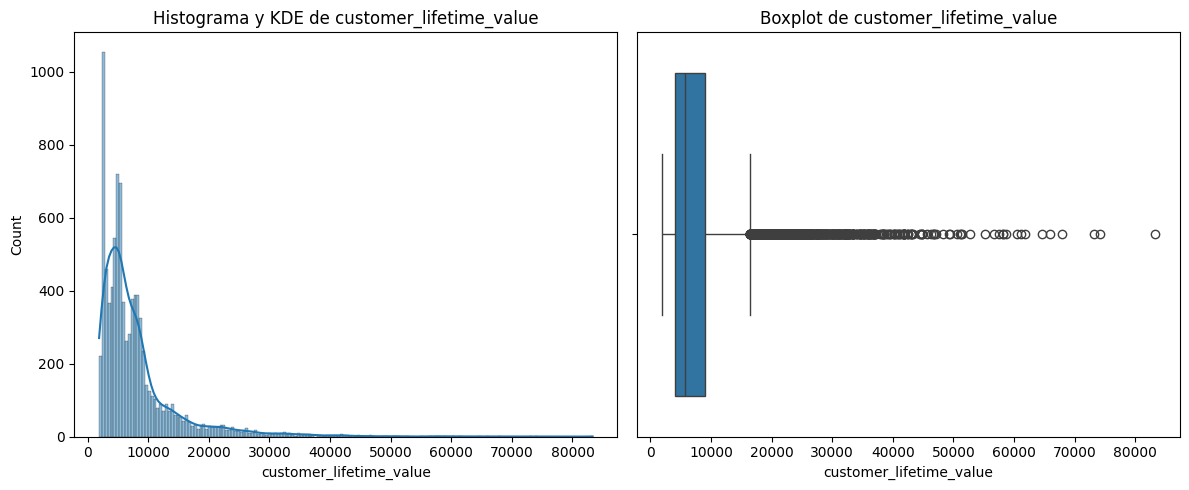

In [59]:
plot_combined_graphs(df_seguros,["customer_lifetime_value"])

**#2** Mostramos diferentes medidas de la variable numérica en función de los valores de la categórica. **Empezamos con la mediana:**

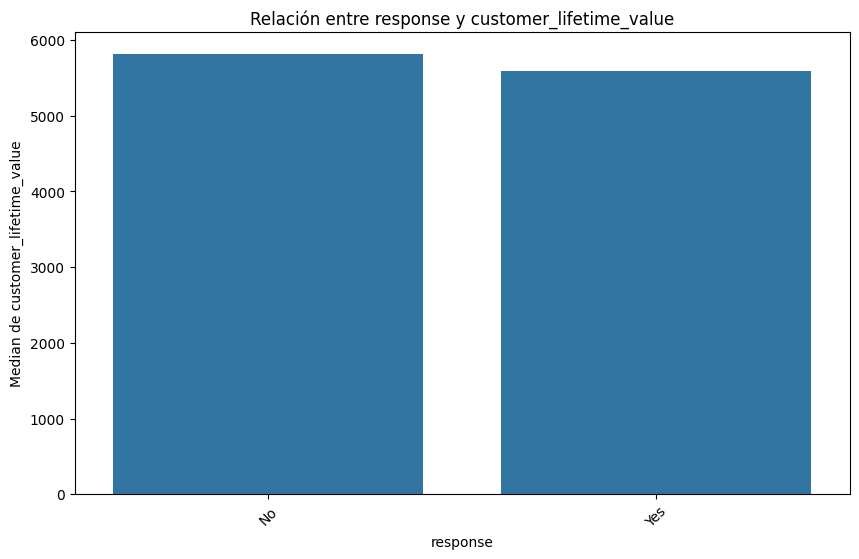

In [60]:
plot_categorical_numerical_relationship(df_seguros,"response","customer_lifetime_value", measure = "median") #--> Si measure = "mean" : hace la comparación con la media

**#3** Mostramos diferentes medidas de la variable numérica en función de los valores de la categórica. **Comparemos los diagramas de caja:**

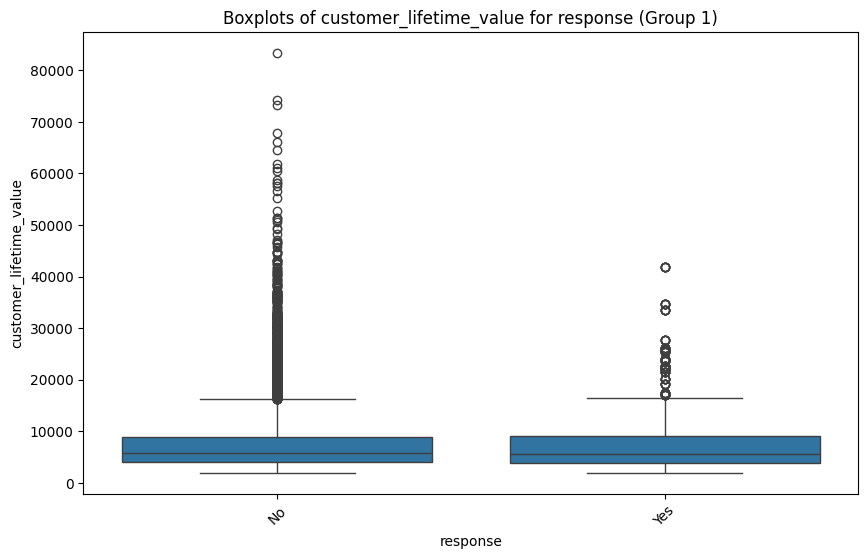

In [61]:
plot_grouped_boxplots(df_seguros,"response","customer_lifetime_value")

Este diagrama ya lo vimos, ¿recuerdas? En cualquier caso ya nos va predisponiendo, ¿verdad? a pensar que... Bueno seamos más puntillosos veamos los histogramas

**#4** Mostramos diferentes medidas de la variable numérica en función de los valores de la categórica. **Comparemos los histogramas:**

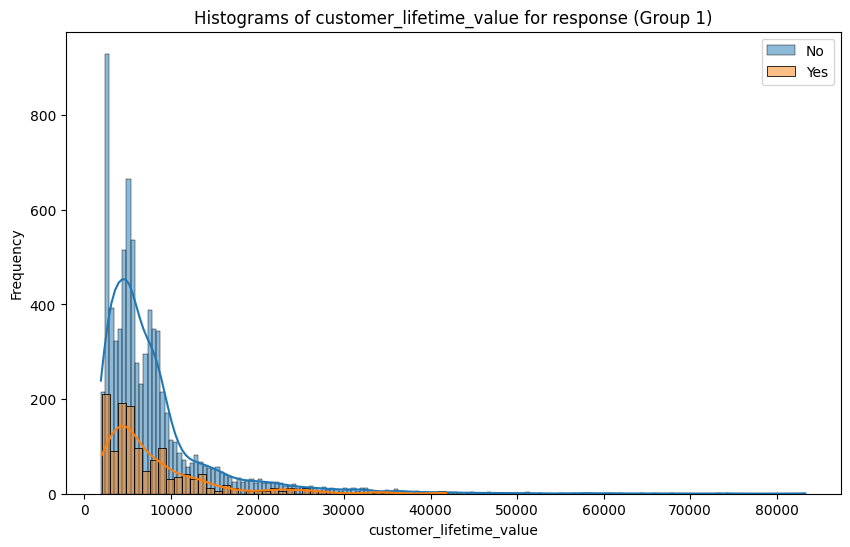

In [62]:
plot_grouped_histograms(df_seguros,"response", "customer_lifetime_value", group_size= 2) #--> group_size = mumero de valores categóricos que quieres meter

Tiene pinta de que salvo por el hecho de que los rangos no coinciden, no hay dependencia entre ambas. Es decir que la respuesta comercial es independiente del CLV. Este resultado me invita a:
* Hacer uso de los test estadísticos para comprobar la independencia de las dos variables [Eso del test lo veremos con cariño en la parte de estadística inferencial, pero veremos como usarlo en un par de píldoras]
* Hacer el análisis descartando outliers, o mejor, hacer un análisis sin outliers y otro para outliers. [Te lo dejo como ejercicio práctico]

En principio me quedo con la intuición/hipótesis de que el CLV y responder a las ofertas de marketing es aparentemente independiente.

Y así seguiría con el resto de variables numéricas y response, por ejemplo. Pero también tendría que hacerlo con las otras categóricas y CLV, porque de hecho es lo que nos han pedido. Por eso te dejo aquí el análisis con `education`, para que lo revises tranquilamente, aunque el vídeo salta a hacer un análisis bivariante visual combinado para el caso 2.

#### Ejemplo extra: CLV-Education

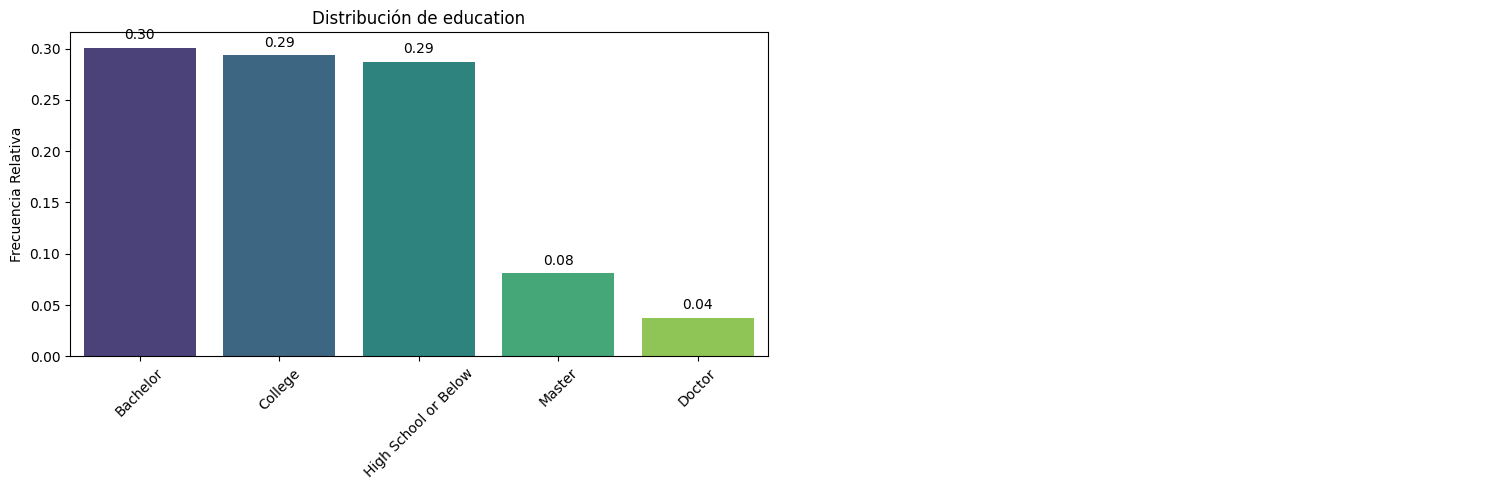

In [63]:
pinta_distribucion_categoricas(df_seguros,["education"], relativa= True, mostrar_valores= True)

(2,)


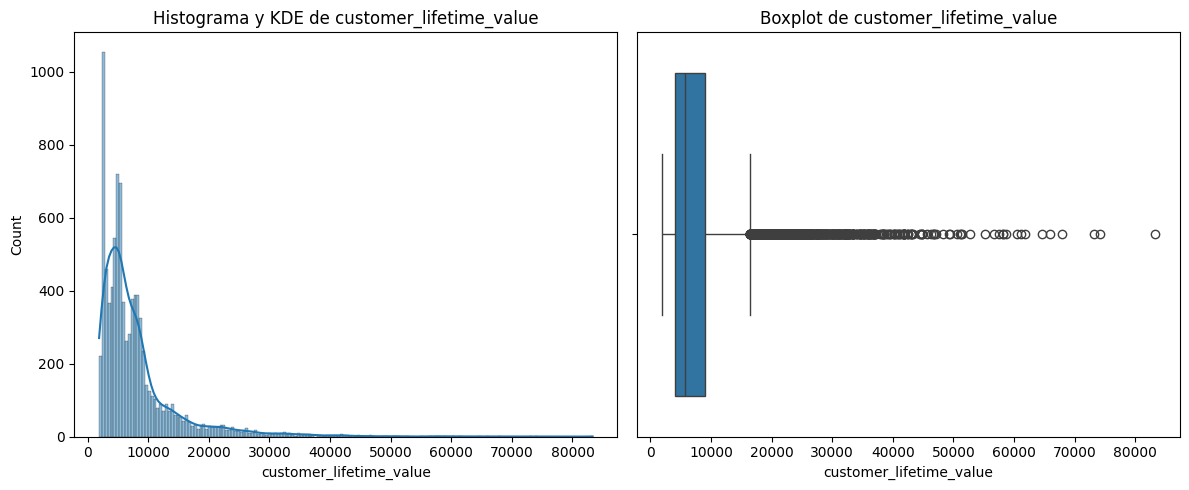

In [64]:
plot_combined_graphs(df_seguros,["customer_lifetime_value"])

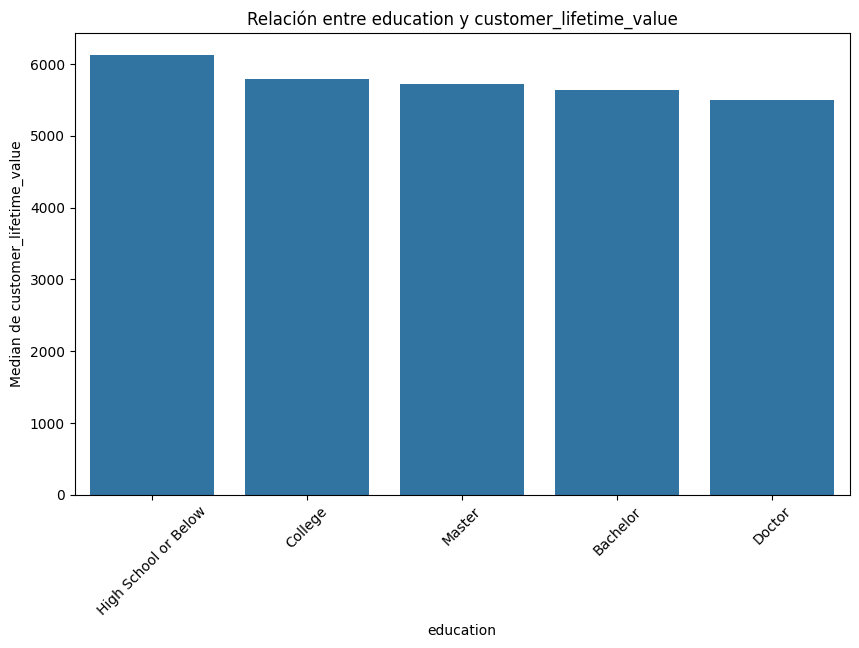

In [65]:
plot_categorical_numerical_relationship(df_seguros,"education","customer_lifetime_value", measure = "median")

Este es un dato curioso, si la mediana es buena representación, no correla linealmente con el grado de estudios (que es una categórica que podríamos considerar ordinal), de hecho los doctores "pagan" menos o eso parece (por ahora eso parece, tendría aquí una hipótesis curiosa para seguir)

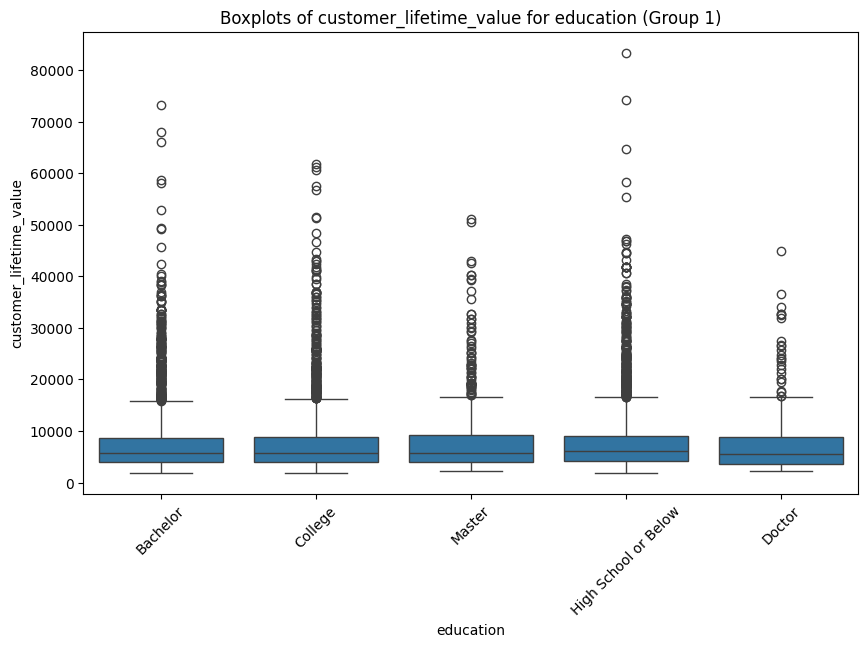

In [66]:
plot_grouped_boxplots(df_seguros,"education","customer_lifetime_value")

Hmm, así es a ojo y en este momento sacaría el describe agrupado de CLV para ver los percentiles, pero tiene pinta de que los que tienen master son los de mayor percentil 75 y que los Doctor tienen mayor dispersión. Esto no me sirve de mucho. Sigamos con las distribuciones. High School or Below parece más compacto y con mejores números que el resto. 
Ah, y fijate donde están los mayores outliers de CLV, eso me plantearía estudiarlos con cuidado, porque no me esperaba que fueran los que más CLV tuviesen. Lo cual no tiene por qué ser nada raro (que sean ellos, pueden ser clientes con flotas de coches, o autónomos con varios coches) pero despierta mi curiosidad.

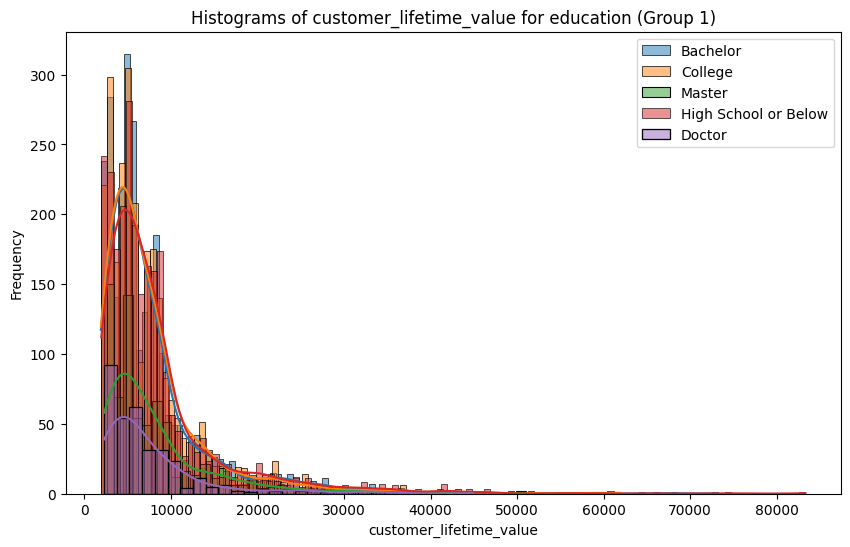

In [67]:
plot_grouped_histograms(df_seguros,"education", "customer_lifetime_value", 5)

Aunque al comparar las distribuciones entre sí, lo cierto es que no parece haber tanta diferencia, siguen perfiles similares, mucho, pero es cierto que los doctores son muchos menos y eso crea ese efecto. En este caso sí que quería ver números:

In [68]:
df_seguros.groupby("education")["customer_lifetime_value"].describe()

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
Bachelor,2748.0,7872.660412,6759.397589,1898.007675,3982.143538,5642.053579,8709.845851,73225.95652
College,2681.0,7851.064644,6686.908165,1898.683686,3924.416277,5792.439588,8870.673845,61850.18803
Doctor,342.0,7520.344837,6267.986710,2267.604038,3530.141132,5494.192881,8747.557593,44856.11397
High School or Below,2622.0,8296.709033,7220.572156,1940.981221,4118.770451,6130.478049,9080.524065,83325.38119
Master,741.0,8243.484692,6908.841255,2272.307310,4064.107529,5718.276608,9150.137599,51016.06704


Sin duda, repetiría este análisis separando los outliers para confirmar que el nivel de educación correla inversamente con el CLV aunque sea muy ligeramente. Y otra métrica interesante que me gustaría comprobar es el porcentaje de outliers en total y por grupo.

### Caso 2. Viajes: Bivariante aircompany-ingresos

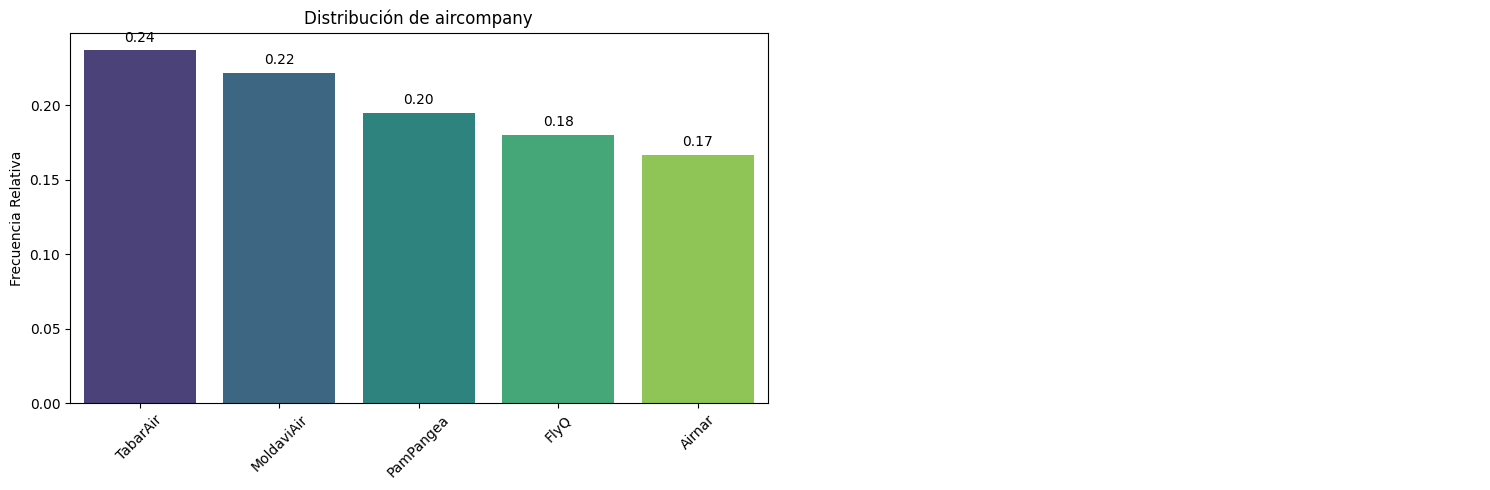

In [69]:
pinta_distribucion_categoricas(df_air_jun,["aircompany"], relativa= True, mostrar_valores= True)

(2,)


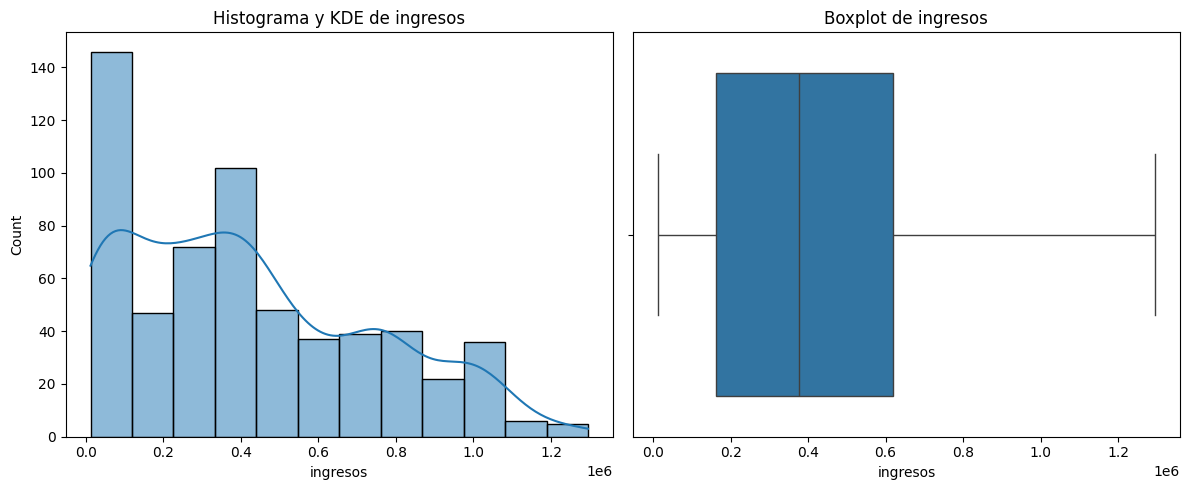

In [70]:
plot_combined_graphs(df_air_jun,["ingresos"])

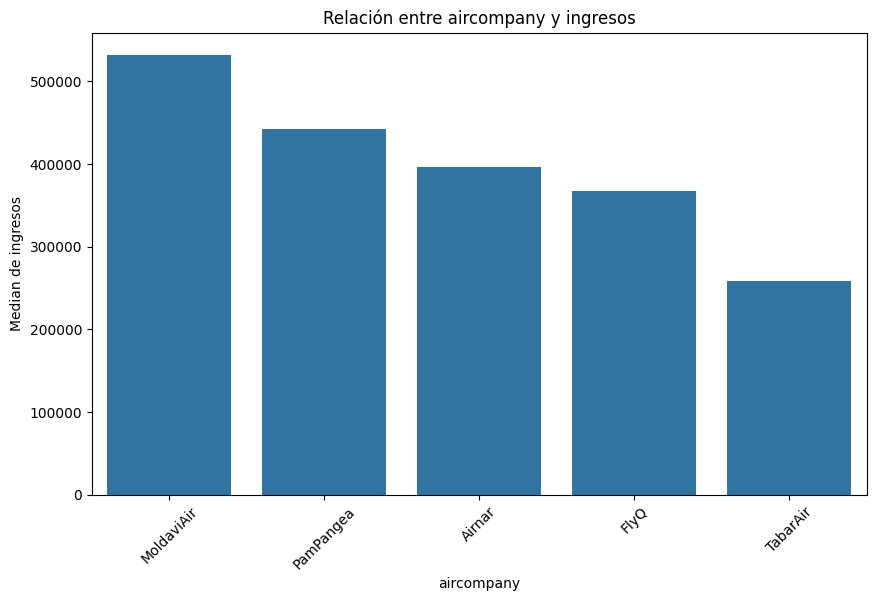

In [71]:
plot_categorical_numerical_relationship(df_air_jun, "aircompany","ingresos",measure="median") # Utilizando mediana

Este resultado parece bastante potente. Tenemos el mayor número de vuelos pero nuestros ingresos considerando la mediana son los menores de todos. Ojo, esto sólo es para quedárselo apuntado, pero es ya una hipótesis de trabajo potente, ¿es esta una mala foto? Puede que seamos la que menos ingresa pero la que menos consume y al final el beneficio se equilibre o sea mayor (es cierto que cada viaje tiene un coste no imputado...) En general hemos encontrado otro punto donde exacarvar... y sacarle todo el jugo, vamos a confirmarlo viendo el resto de comparativas

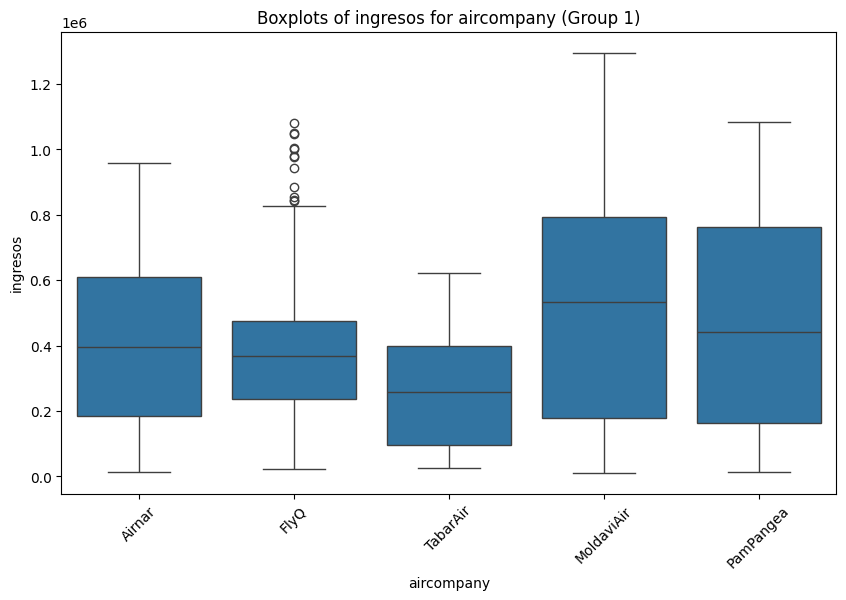

In [72]:
plot_grouped_boxplots(df_air_jun,"aircompany","ingresos")

Esto tiene mala pinta sin duda, para Tabarair, para nuestro estudio es magnífico porque nos abre todo un camino de trabajo.

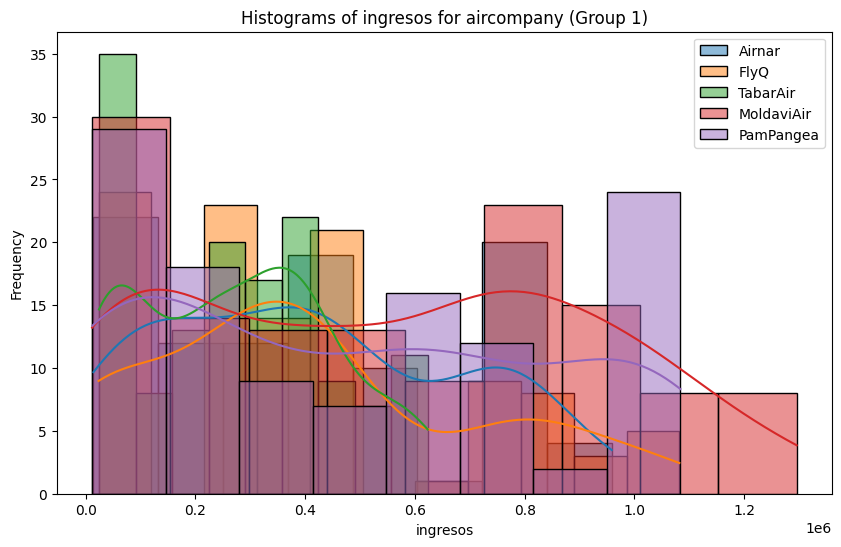

In [73]:
plot_grouped_histograms(df_air_jun,"aircompany", "ingresos", 5)

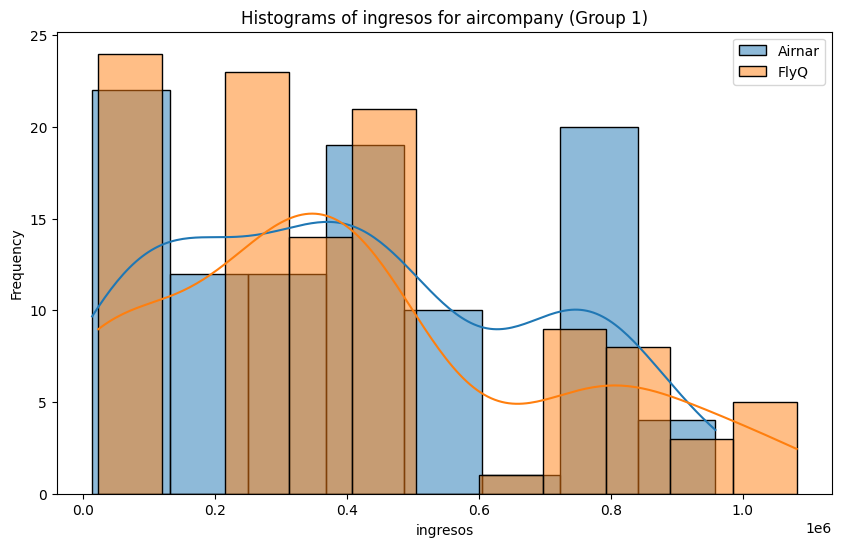

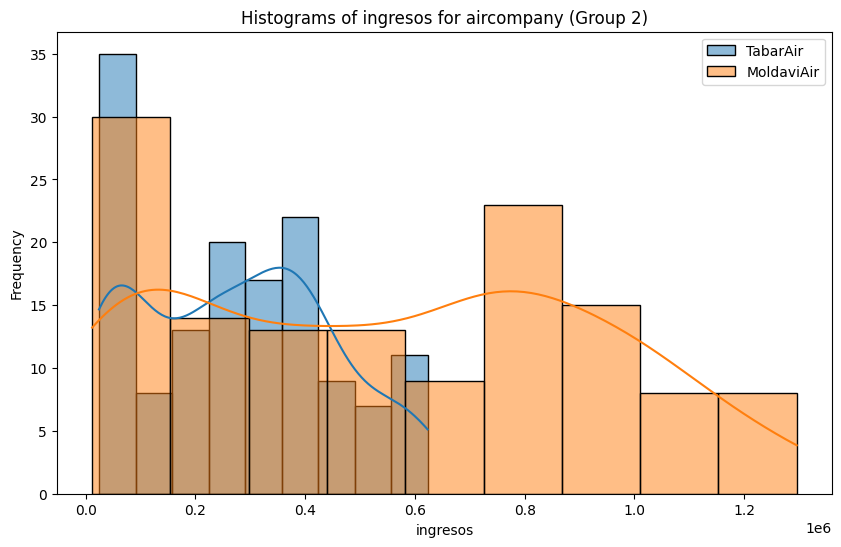

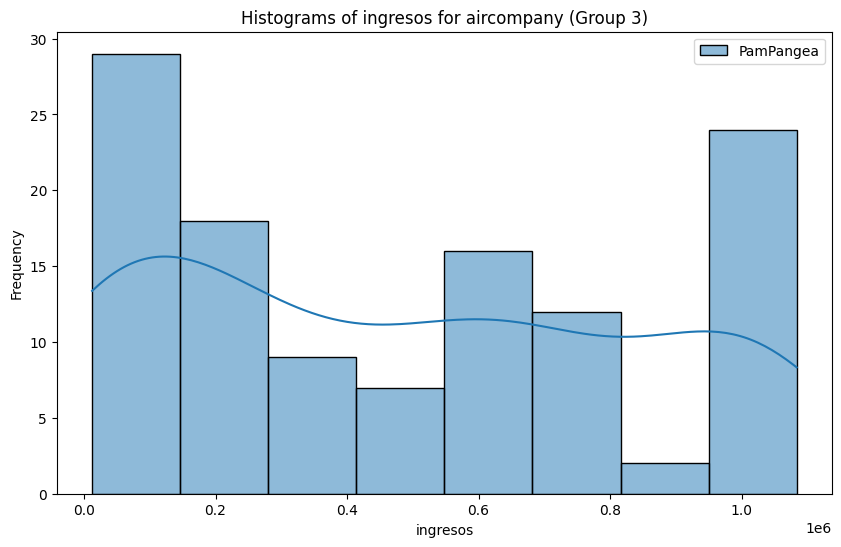

In [74]:
plot_grouped_histograms(df_air_jun,"aircompany", "ingresos", 2)

Se ve claramente que TabarAir tiene el menor rango de ingresos, que ya lo sabíamos de ver los boxplots, y que casi los concentramos, habrá que compararlo con distancias y consumos para chequear la eficiencia. Y sin ser un experto parece que Pampangea y Moldaviair tienen una dispersión de ingresos que invita a pensar que están mejor diversificados (tienen vuelos de todos los gustos, aunque esto es otra hipótesis a confirmar). Lo importante: Tabarair es la empresa con más vuelos, menos ingresos en mediana, menor rango de ingresos con un pico en vuelos de pocos ingresos y una distribución casi gaussiana. Mientras Airnar con menos vuelos es la tercera en ingresos. Hmm, se pone interesante este dataset.

## Análisis de Datos (Bivariante): Numéricas. Correlaciones

En esta sesión vamos a analizar las variables numéricas de nuestros datasets y para ello vamos a utilizar dos herramientas el diagrama de dispersión y la correlación matemática. Pero ojo, eso es así por la naturaleza de nuestros datos, pero si nuestro dataset fuera por ejemplo de diferentes cotizaciones de empresas en los últimos 365 días entonces añadiríamos a lo anterior (de hecho lo haríamos lo primero) un gráfico de evolución temporal de las mismas en el que ambas estuvieran presentes. [Recuerda que no contemplamos el análisis de series temporales en el workout pero haremos algùn ejercicio ilustrativo]

### Caso 1. Seguros: Bivariante CLV-Ingresos

En línea con investigar la relación entre `response` y `CLV` tenemos el análisis entre `CLV` e `ingresos`. Como en las otras veces:

**#1**  Tener la referencia de la **distribución de valores por separado de cada variable**

(2,)


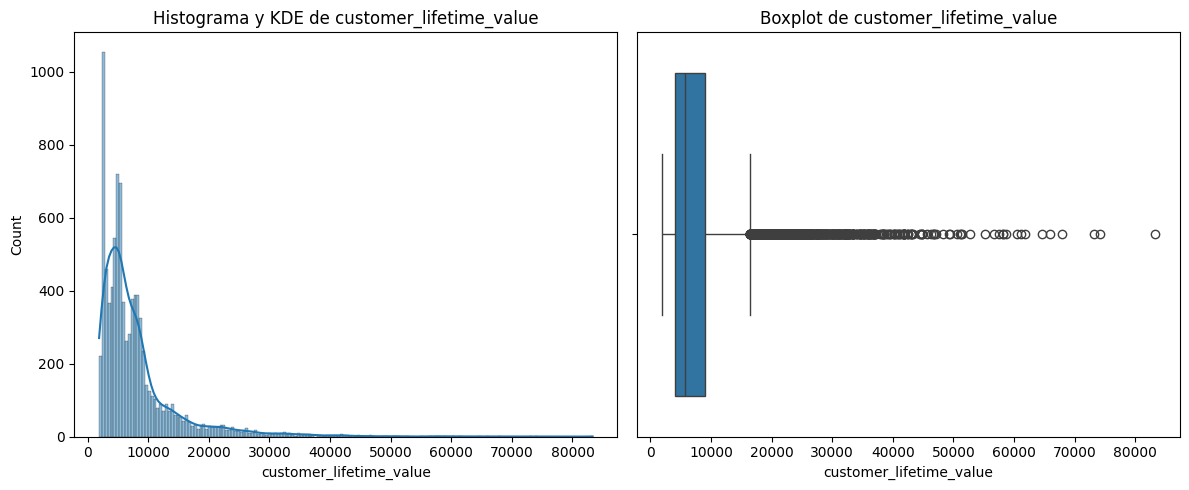

In [75]:
plot_combined_graphs(df_seguros,["customer_lifetime_value"])

(2,)


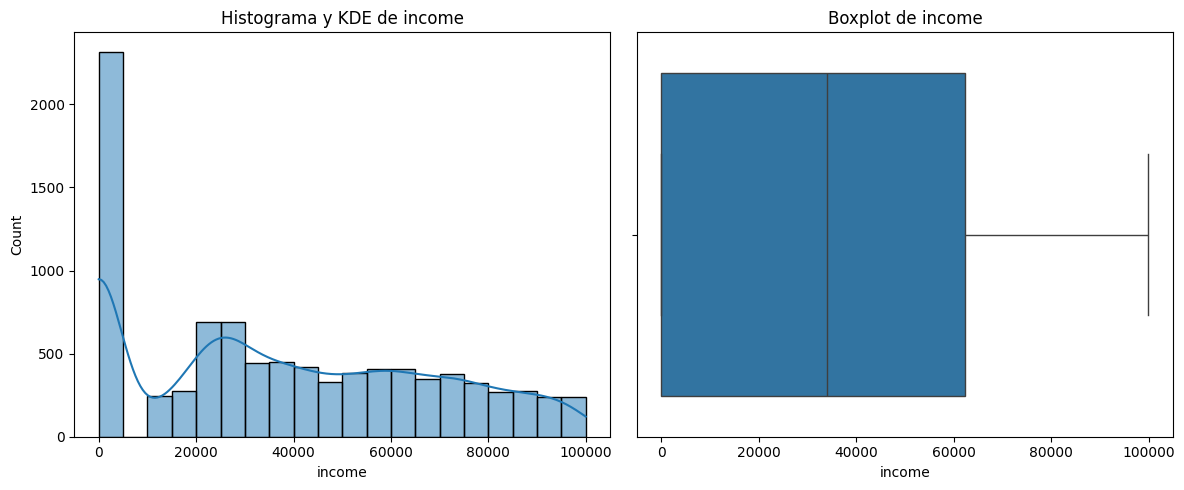

In [76]:
plot_combined_graphs(df_seguros,["income"], bins = 20) #--> bins = número de barras

**#2** Como ambas variables están medidas en la misma unidad mostramos **una comparación numérica de sus `describe`**:

In [77]:
df_seguros[["customer_lifetime_value","income"]].describe()

,customer_lifetime_value,income
count,9134.000000,9134.000000
mean,8004.940475,37657.380009
std,6870.967608,30379.904734
min,1898.007675,0.000000
25%,3994.251794,0.000000
50%,5780.182197,33889.500000
75%,8962.167041,62320.000000
max,83325.381190,99981.000000


**#3** Y ahora comparamos los datos unos con otros. **Utilizamos un diagrama de dispersión *scattered plot***

Un scatter plot, o diagrama de dispersión, es un tipo de gráfico en el que cada punto representa un observación individual, con la posición en el eje horizontal (X) indicando el valor de una variable y la posición en el eje vertical (Y) indicando el valor de la otra variable.



Los scatter plots son útiles para observar la relación entre dos variables numéricas. Se utilizan para detectar correlaciones, tendencias, agrupaciones, o para identificar patrones inusuales o valores atípicos (outliers) en los datos. 

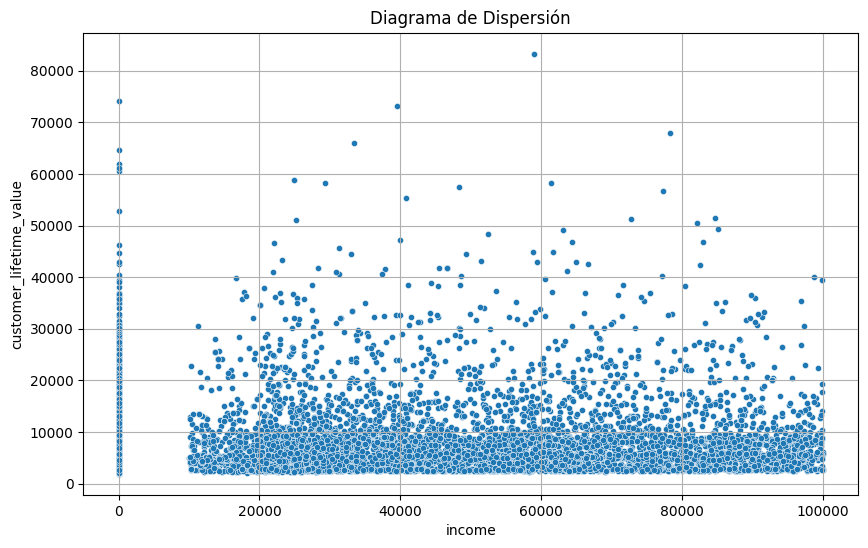

In [78]:
grafico_dispersion_con_correlacion(df_seguros,"income","customer_lifetime_value", 20)

### Correlación y relación entre variables numéricas


La [correlación](https://es.wikipedia.org/wiki/Correlaci%C3%B3n) trata de establecer la relación o **dependencia que existe entre las dos variables**. Es decir, determinar si los cambios en una de las variables influyen en los cambios de la otra. En caso de que suceda, diremos que las variables están correlacionadas o que hay correlación entre ellas. La correlación es **positiva** cuando los valores de las variables aumenta juntos; y es **negativa** cuando un valor de una variable se reduce cuando el valor de la otra variable aumenta.


Pero no acaba aquí la cosa hay un coeficiente matemático (de hecho hay varios) que miden esa relación. El más utilizado, y el que vamos a usar nosotros es el **coeficiente o correlación de Pearson**. Cuya fórmula te dejo aquí (no te asustes que usaremos funciones y métodos para obtenerlo):

$$r = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2 \sum_{i=1}^{n} (y_i - \bar{y})^2}}$$


En esta fórmula:

- $r$ es el coeficiente de correlación de Pearson.
- $x_i$ y $y_i$ son los valores individuales de las dos variables.
- $\bar{x}$ y $\bar{y}$ son las medias de las variables `x` y `y`, respectivamente.
- $n$ es el número de observaciones (parejas de valores).

El coeficiente $r$ varía entre -1 y 1, donde_
* 1 significa una correlación positiva perfecta 
* -1 una correlación negativa perfecta
* 0 indica que no hay correlación **lineal** entre las variables. [marco lineal en negrita porque puede haber otro tipo de relación]

Y yendo a lo práctico, tenemos varias formas de obtener ese coeficiente:

In [79]:
df_seguros[["income","customer_lifetime_value"]].corr()

,income,customer_lifetime_value
income,1.000000,0.024366
customer_lifetime_value,0.024366,1.000000


In [80]:
from scipy.stats import pearsonr

pearsonr(df_seguros["income"], df_seguros["customer_lifetime_value"])

PearsonRResult(statistic=0.024365660747409135, pvalue=0.019874910954666508)

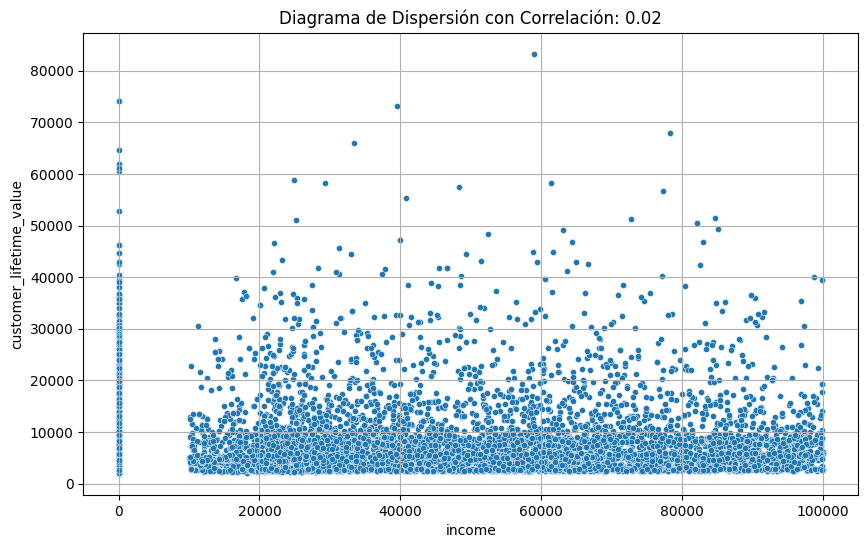

In [81]:
grafico_dispersion_con_correlacion(df_seguros,"income","customer_lifetime_value", 20, mostrar_correlacion = True)

Básicamente: No están correladas linealmente, lo cual ya nos lo podemos apuntar como un elemento más de nuestro análisis. 

Pero no termina aquí el análisis, ahora está claro que es necesario hacer el análisis en dos. Fijate en el salto entre 0 y el siguiente valor. **El 0 es un outlier de Income** que no habíamos visto antes. Así que hay que quitarlo y quizás analizar por separado y preguntar que tipo de cliente es este (seguros contratados por otros?) y también así dejar limpiar la varible income para analizarla con el resto.

(2,)


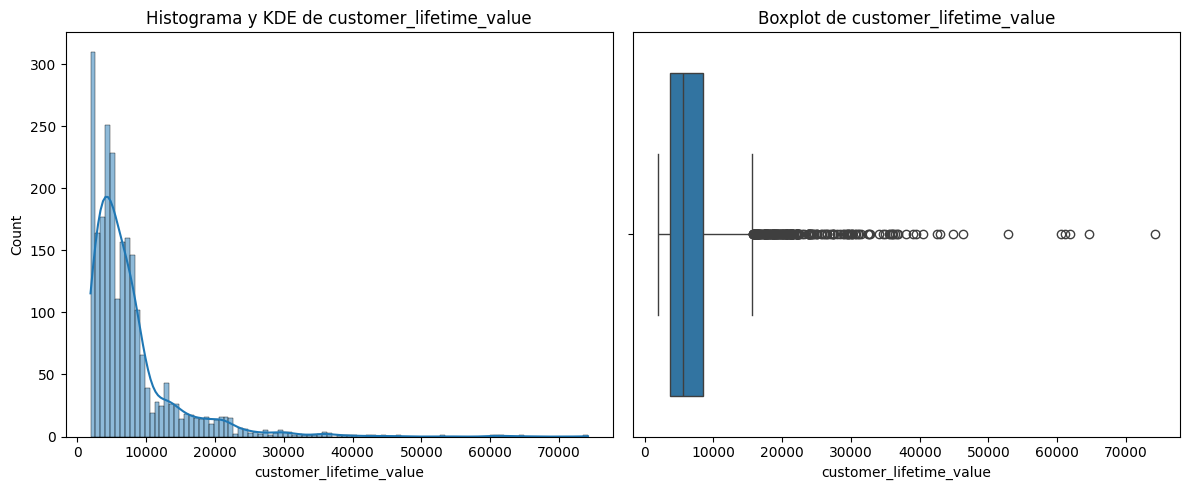

In [82]:
plot_combined_graphs(df_seguros.loc[df_seguros.income == 0], ["customer_lifetime_value"])

(2,)


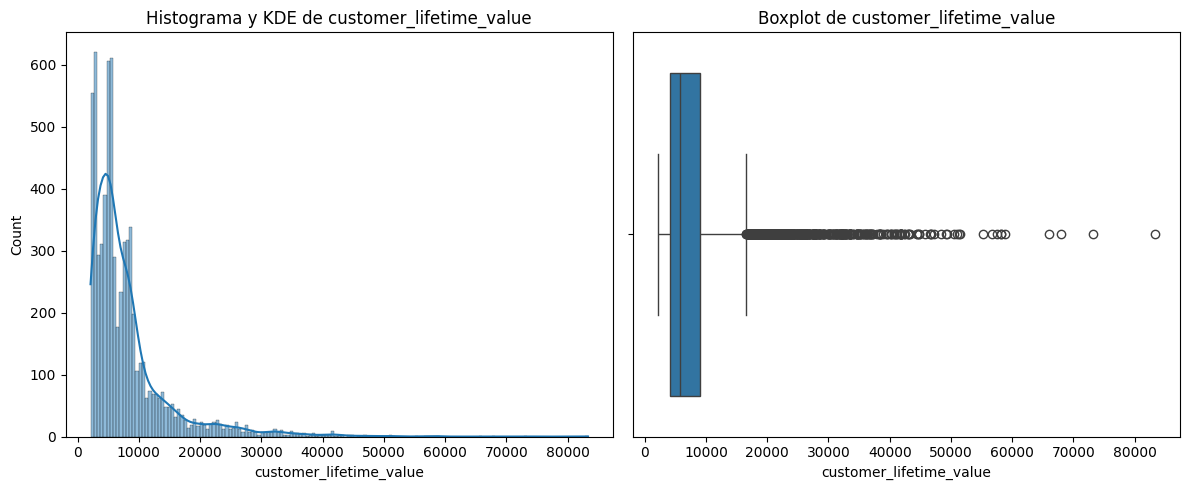

In [83]:
plot_combined_graphs(df_seguros.loc[df_seguros.income > 0], ["customer_lifetime_value"])

Tiene pinta de que income = 0 es una forma de marcar "No sabemos el income" del cliente. Esto es otro dato a preguntar, y claramente ahora tendría que hacer los dos análisis por separado.

### Contraste de hipótesis y el p-value (una intro muy grosera a modo de adelanto)

Ahora y en las sesiones siguientes vamos a hacer uso de una técnica estadística denominada contraste de hipótesis que es básicamente una "prueba del algodón" matemática para dar "credibilidad matemática" a afirmaciones como "la variable x e y están correledas". Por ejemplo, en el caso en el que dos variables muestren un coeficiente de 0.02 de Pearson, ¿cuánto podemos asegurar de que esto implica que son independientes (linealmente)? Bueno ojo en el caso que estamos viendo son los valores que hay (recuerda que es la población total) pero nosotros hacemos una extensión estadística [eh, JAime, ein, qué, nada no le des importancia, a esto último y vamos a lo que vamos. 

La contestación a esa pregunta nos la da "el contraste de hipótesis" (que veremos con un poco más de rigor cuando entremos en el mundo de la estadística inferencial en el módulo siguiente). Para algunas medidas tendremos un test (esa prueba del algodón) con nombres tan sugerentes como t de student, chi cuadrado, test de Wilcoxon, test de Shapiro-Wilk o prueba F de Fisher.


En esos test planteamos nuestra hipótesis y haciendo los pasos del test (buscando y cruzando en tablas, rezando a la luna, etc,etc no en serio son test de cuando todo se hacía con tablas y a mano) este test te va a dar un valor denominado p-value que es básicamente la probabilidad de que la hipótesis contraria a la tuya sea lo normal. Es decir cuanto más bajo ese p más "seguro" podrías estar de que tu suposición es correcta.

Resumiendo:
* En esta píldora y en las siguientes vamos a ver una serie de test (y como se hacen con Python) que nos darán ese valor p o probabilidad de sorpresa, y si ese valor p está por debajo de un umbral (típicamente 0.05) entonces pensaremos que nuestra suposición (que dos variables tienen relación) puede ser cierta con bastante confianza. En terminos formales nos dirá que la relación o falta de ella es `estadísticamente significativa`



Ahora olvida lo dicho y cuando obtengas el diagrama de dispersión entre dos variables numéricas, también obtén su coeficiente de correlación usando el la función `pearsonr` tal como has visto, si el valor p que obtienes es menor de 0.05 puedes pensar que el resultado obtenido es estadísticamente significativo (vamos que te puedes fiar del coeficiente salido y de sus consecuencias, cercano a 1 o -1 es que hay correlación lineal, y cercano o entorno a cero es que son independientes linealmente)

## Análisis de Datos (Bivariante): Test de relación entre variables categóricas

Para ver si dos variables categóricas presentan alguna relación (cambios conjuntos, cambios en una de un tipo se dan al mismo tiempo que cambios de otro tipo en la otra, etc) hicimos el análisis visual. Si mis datos son todos los datos que manejo, ese análisis visual ya nos dice si existe la relación, pero si mis datos no son todos o quiero extrapolarlos, tengo que ganar confianza en lo que he "visto" en el análisis visual y para ello aplicamos los test.

### Test Chi-Cuadrado (χ²)

Nosotros para ver la relación entre dos variables categóricas vamos a emplear el test χ², al final te dejo un anexo con las condiciones en las que se puede aplicar (ojo, no siempre podremos tenlo en cuenta), y el método "manual" para hacer el test. Ahora vamos a ir al grano... 

#### Caso 1. Seguros: Relación response-state y response-renew_offer_type

Recordemos como era esa relación visualmente.

Para response-state


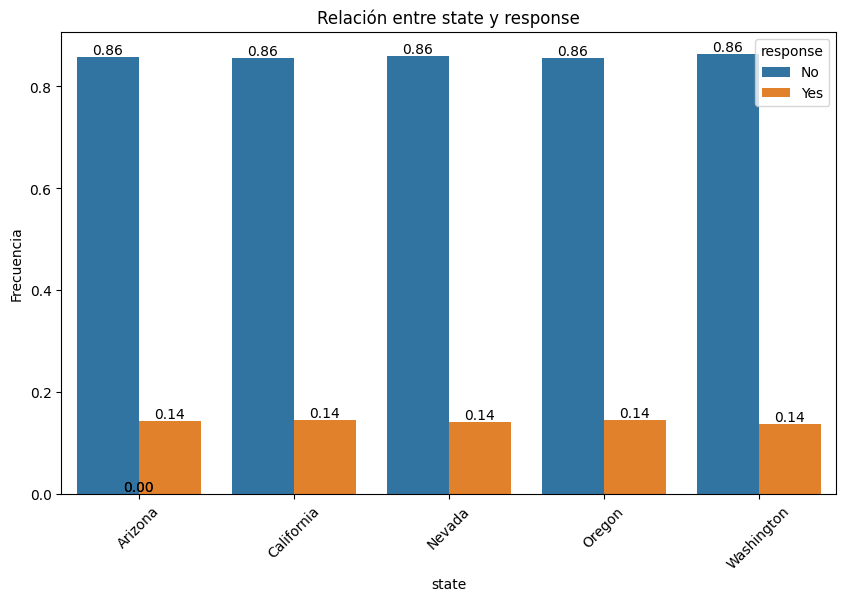

In [84]:
plot_categorical_relationship_fin(df_seguros, "state","response", relative_freq = True, show_values = True)

Para response-renew_offer_type

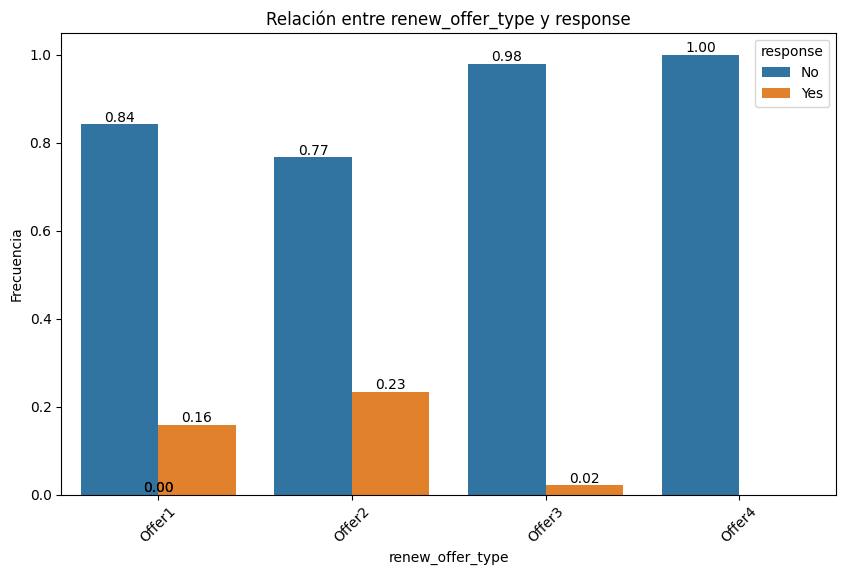

In [85]:
plot_categorical_relationship_fin(df_seguros, "renew_offer_type","response", relative_freq = True, show_values = True)

#### Procedimiento

(Insisto si los datos son toda la población y no vamos a extrapolar: no hay relación entre response y estado, hay una relación interesante entre response y el tipo de oferta)

**#1 Obtenemos la tabla de contingencia** (las frecuencias de aparición de la combinación de valores)

In [86]:
tabla_contingencia = pd.crosstab(df_seguros['response'], df_seguros['state'])

tabla_contingencia

state,Arizona,California,Nevada,Oregon,Washington
response,,,,,
No,1460,2694,758,2225,689
Yes,243,456,124,376,109


**#2 Aplicamos la prueba** (utilizando la función adecuada del módulo scipy.stats) y mostramos los resultados

In [87]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 0.4384775299588324
P-Value: 0.9792071512335693
Grados de Libertad: 4
Tabla de Frecuencias Esperadas:
 [[1459.1283118  2698.91613751  755.6965185  2228.53361069  683.7254215 ]
 [ 243.8716882   451.08386249  126.3034815   372.46638931  114.2745785 ]]


**#3 Interpretación de resultados** (depende de lo que estemos esperando)

El test chi-2 tiene como hipótesus nula (o de partida) la independencia de las variables, por tanto un P-Value menor de 0.05 nos diría que podemos rechazar la hipótesis de partida con seguridad y pensar que existe una relación estadísticamente significativa. 

¿Y en este caso? Pues en este caso, es todo lo contrario, refuerza la hipótesis de partida de que son independientes, añadiendo el análisis visual... Sí, son independientes 

Aplicado de una vez a la otra relación (response-renew_offer_type):

In [88]:
tabla_contingencia = pd.crosstab(df_seguros['response'], df_seguros['renew_offer_type'])
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 548.1644514293835
P-Value: 1.73695030654266e-118
Grados de Libertad: 3
Tabla de Frecuencias Esperadas:
 [[3214.70899934 2506.99321217 1226.9358441   877.36194438]
 [ 537.29100066  419.00678783  205.0641559   146.63805562]]


Hmm, ojo que p-value no es 1.73 está en notación científica (es eso con una coma y 117 ceros delante) o sea que podemos tener cierta confianza en que sí que la respuesta depende de la oferta (ya un poco de perogrullo) pero así es como funciona.

#### Caso 2. Viajes: Relación aircompany-destino

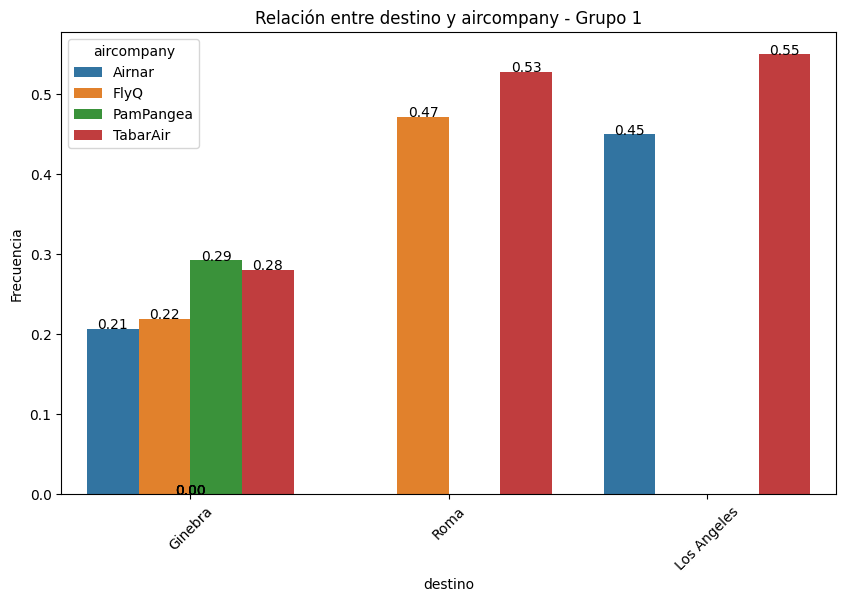

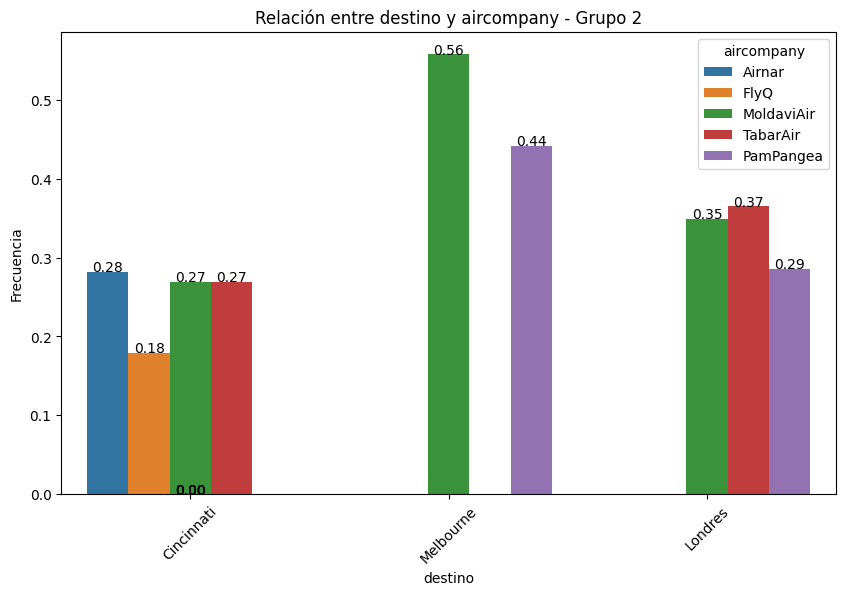

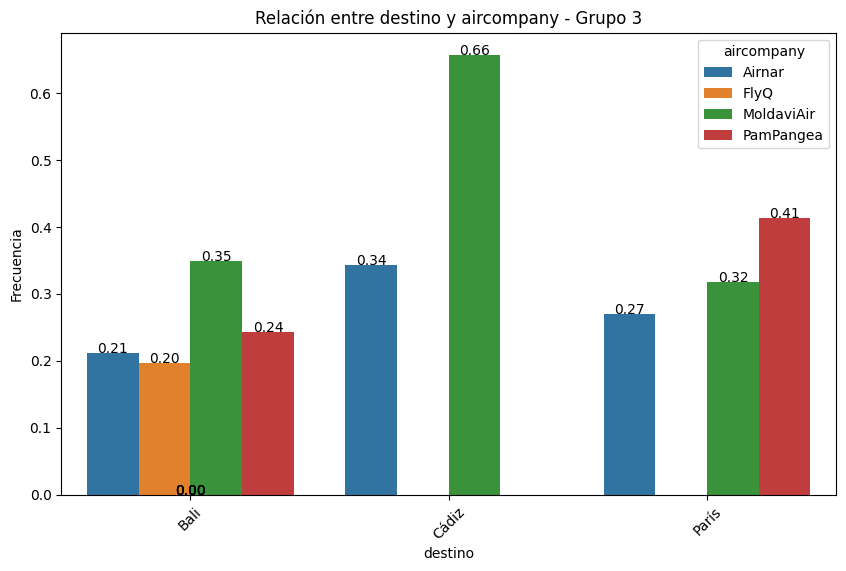

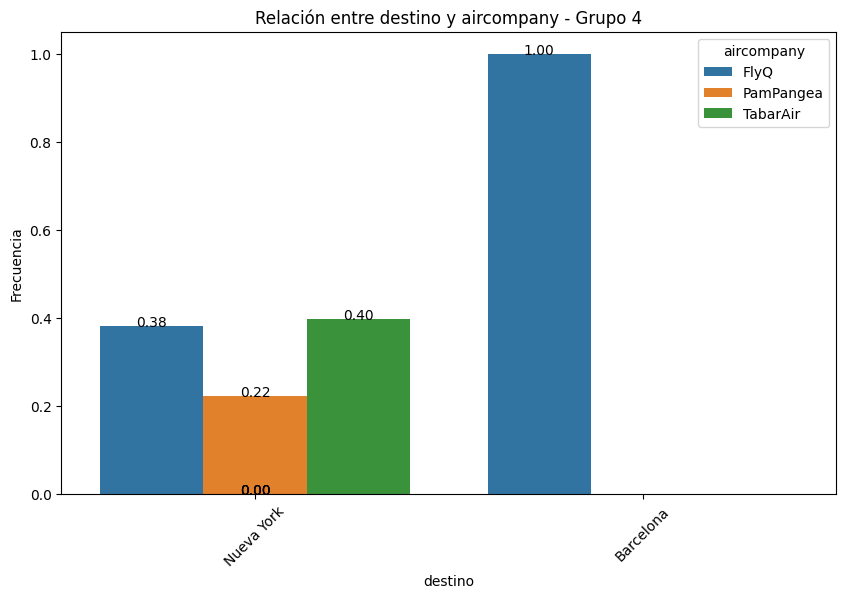

In [89]:
plot_categorical_relationship_fin(df_air_jun, "destino","aircompany", relative_freq = True, show_values = True, size_group = 3)

In [90]:
tabla_contingencia = pd.crosstab(df_air_jun['aircompany'], df_air_jun['destino'])
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 513.3047172905651
P-Value: 1.8324011299397667e-83
Grados de Libertad: 40
Tabla de Frecuencias Esperadas:
 [[11.          2.33333333 13.          5.83333333 13.66666667 10.5
   6.66666667  7.16666667 10.5        10.5         8.83333333]
 [11.88        2.52       14.04        6.3        14.76       11.34
   7.2         7.74       11.34       11.34        9.54      ]
 [14.63        3.10333333 17.29        7.75833333 18.17666667 13.965
   8.86666667  9.53166667 13.965      13.965      11.74833333]
 [12.87        2.73       15.21        6.825      15.99       12.285
   7.8         8.385      12.285      12.285      10.335     ]
 [15.62        3.31333333 18.46        8.28333333 19.40666667 14.91
   9.46666667 10.17666667 14.91       14.91       12.54333333]]


Según el test hay una relación estadística significativa, relación que podíamos observar visualmente (el hecho de que no todas las compañías viajen a todos los lugares ya es una relación, por ejemplo)

### ANEXO: Test Chi-cuadrado (χ²): ¿Cuándo Aplicar la Prueba de Chi-Cuadrado?



- **Objetivo:** Se utiliza cuando quieres determinar si hay una asociación significativa entre dos variables categóricas. Por ejemplo, si quieres saber si hay una relación entre género (hombre/mujer) y preferencia de un producto (me gusta/no me gusta).

- **Condiciones de Uso:** Idealmente, se utiliza cuando las categorías son mutuamente excluyentes y las frecuencias observadas en las categorías son suficientemente altas (generalmente, se espera que el 80% de las celdas tengan una frecuencia esperada de al menos 5).


Links: [test chi-cuadrado en wikipedia](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_%CF%87%C2%B2) y [paso a paso](https://datatab.es/tutorial/chi-square-test)

## Análisis de Datos (Bivariante): Test de relación entre categórica y numérica

### Caso 1. Seguros: Relacion response-CLV


Como siempre primero recordamos que pinta tienen nuestros valores por separados y el análisis visual que hicimos cuando los combinamos hace ya unas cuantas sesiones

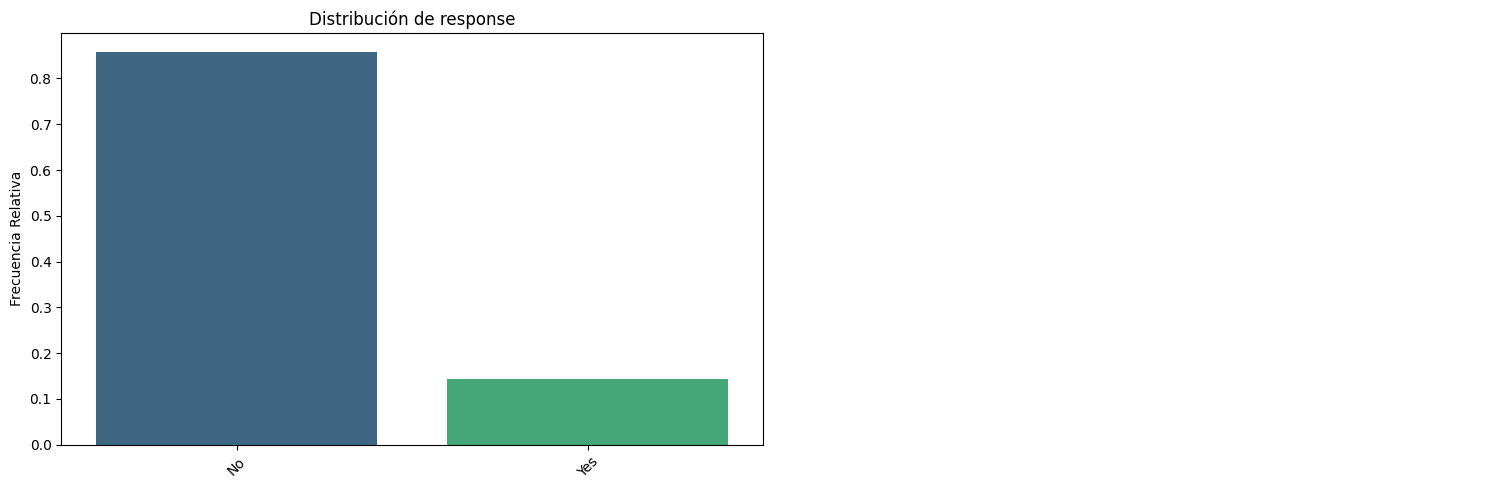

In [91]:
pinta_distribucion_categoricas(df_seguros,["response"], relativa= True)

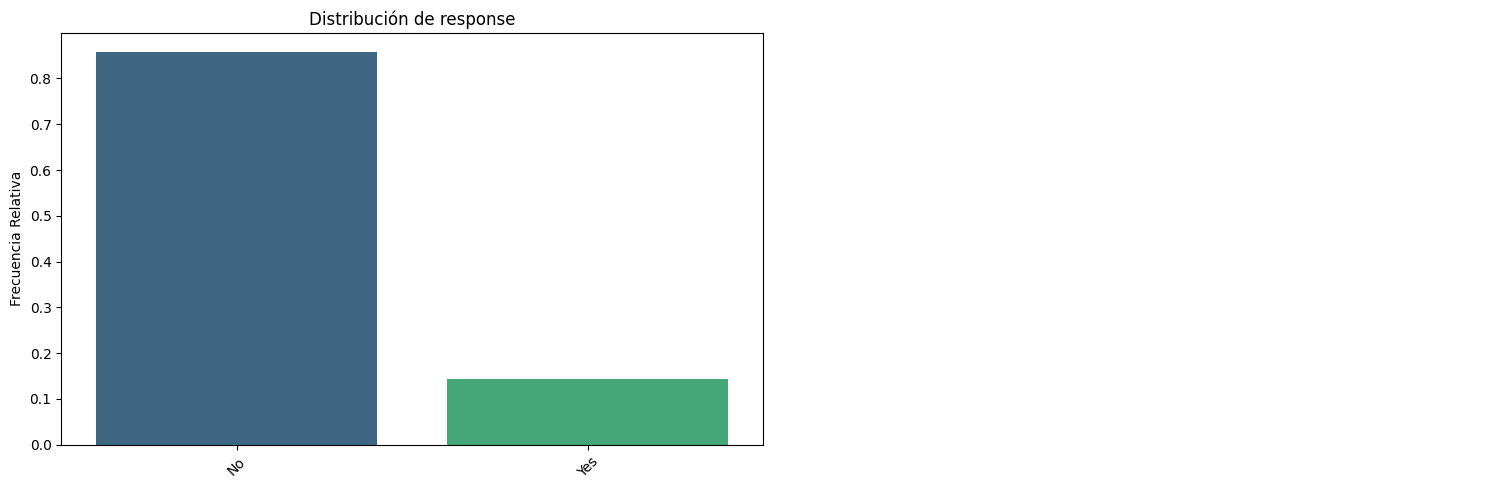

In [92]:
pinta_distribucion_categoricas(df_seguros,["response"], relativa= True)

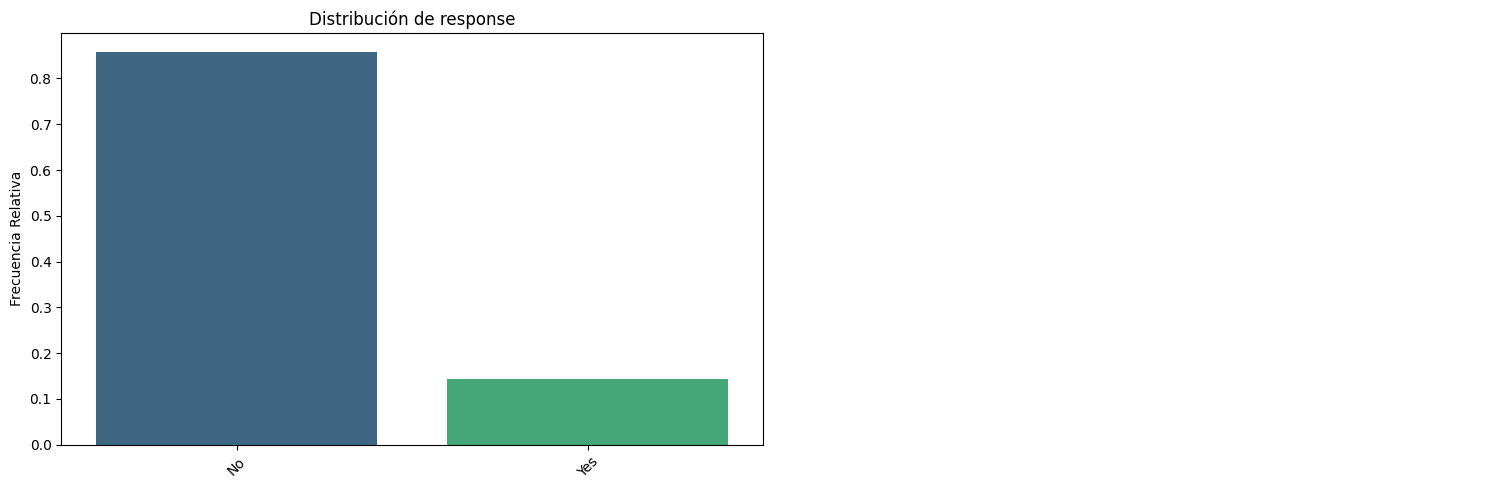

In [93]:
pinta_distribucion_categoricas(df_seguros,["response"], relativa= True)

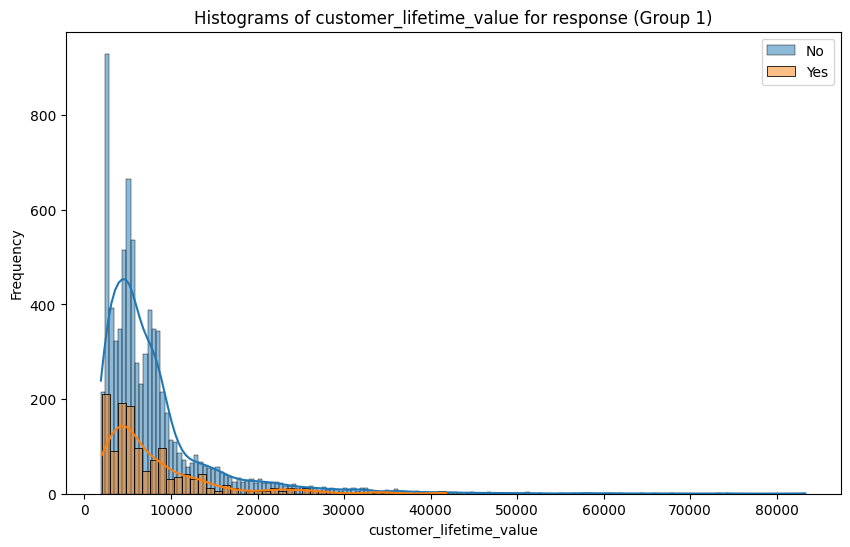

In [94]:
plot_grouped_histograms(df_seguros, cat_col="response",num_col="customer_lifetime_value", group_size= 2)

Como puedes ver, `response` es una variable binaria, en esa situación se suele utilizar el test t-Student si se cumplen determinadas condiciones (entre otras que los valores estén distribuidos como una normal, es decir una campana  de gauss) pero que no se cumplen así que nosotros usaremos [la prueba U de Mann-Whitney](https://datatab.es/tutorial/mann-whitney-u-test):

#### Aplicando la prueba U de Mann-Whitney:

**#0 Importar el test de scipy**

In [95]:
from scipy.stats import mannwhitneyu # Sí, de scipy.stats :-)


**#1 Separar los datos en dos grupos según la variable categórica**


In [96]:
grupo_a = df_seguros.loc[df_seguros.response == "Yes"]["customer_lifetime_value"]
grupo_b = df_seguros.loc[df_seguros.response == "No"]["customer_lifetime_value"]


**#2 Aplicar la prueba y mostrar los resultados**

In [97]:

u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)

print("Estadístico U:", u_stat)
print("Valor p:", p_valor)


Estadístico U: 5060988.0
Valor p: 0.5168872245291198


**#3 Interpretación del valor p (p-value)**

En este caso la hipótesis nula (o directora) es que no hay diferencia estadística significativa entre las medianas de los valores, si hubieramos obtenido un p-value por debajo de 0.05, hubieramos rechado la hipótesis nula y habríamos dicho que hay confianza estadística en que las medianas de cada grupo son diferentes para cada valor y que hay una relación entre los valores de la categórica y los de la numérica. Como no es el caso no podemos rechazar la hipótesis. Es decir no podemos decir que haya esa relación entre las dos variables.

En resumen: 
* Según este test, no podemos asegurar que la respuesta y el CLV tengan relación. Lo que reafirma nuestra confirmación visual, pero no confirma. 

### Caso 2. Viajes: Relación entre aircompany e ingresos

Pintamos los valores:

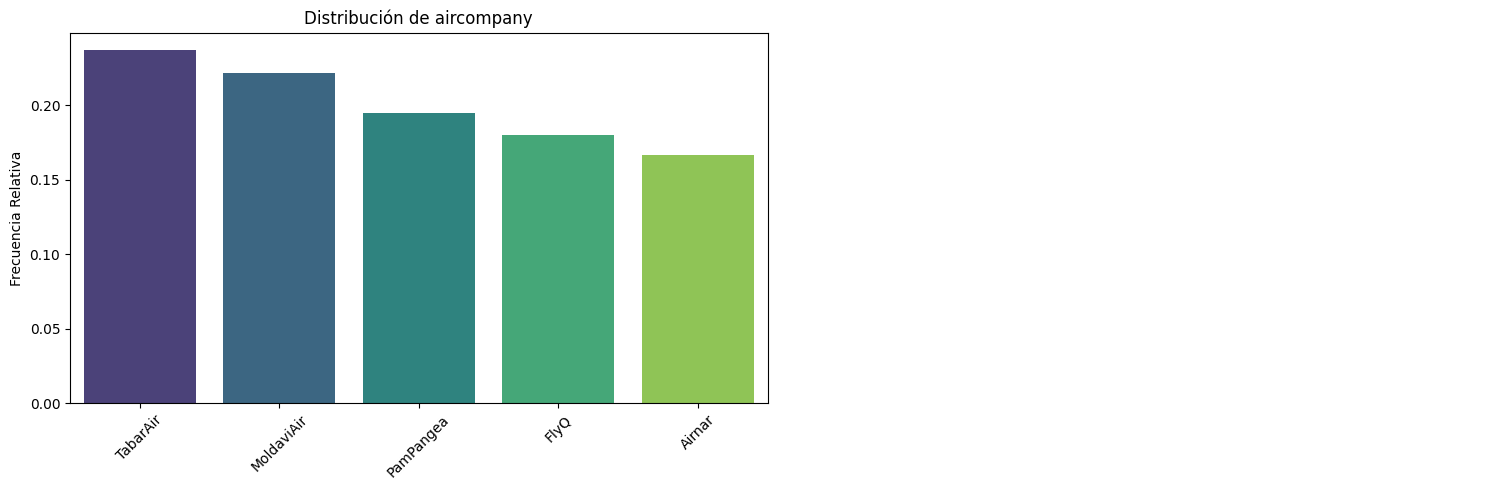

In [98]:
pinta_distribucion_categoricas(df_air_jun,["aircompany"], relativa= True)

(2,)


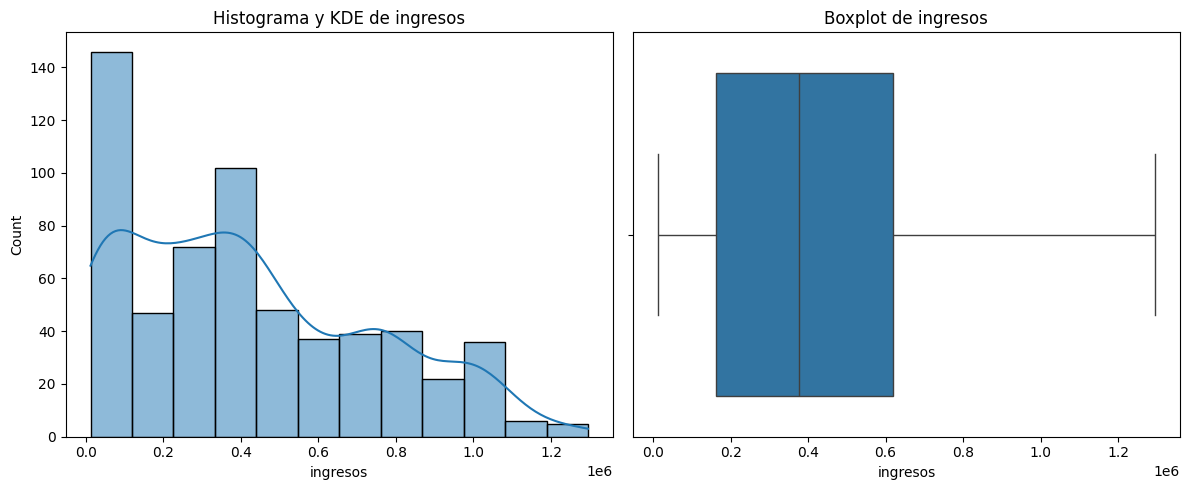

In [99]:
plot_combined_graphs(df_air_jun, ["ingresos"])

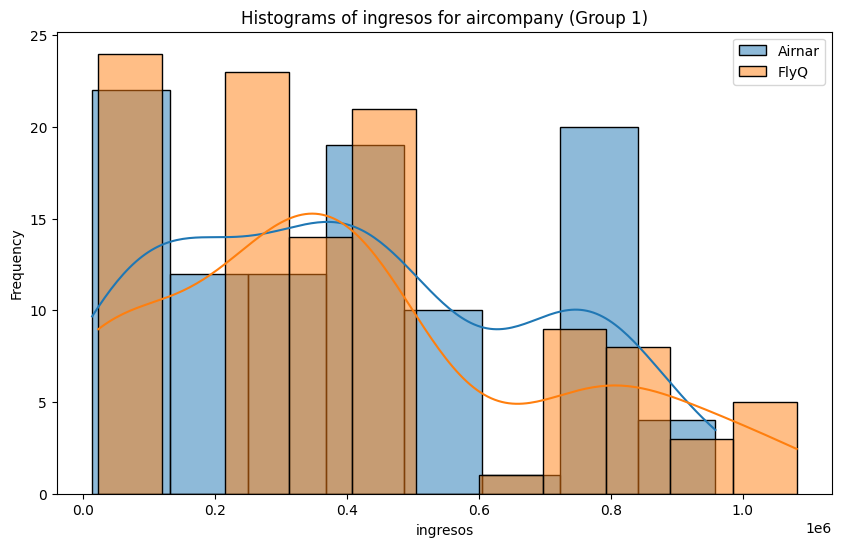

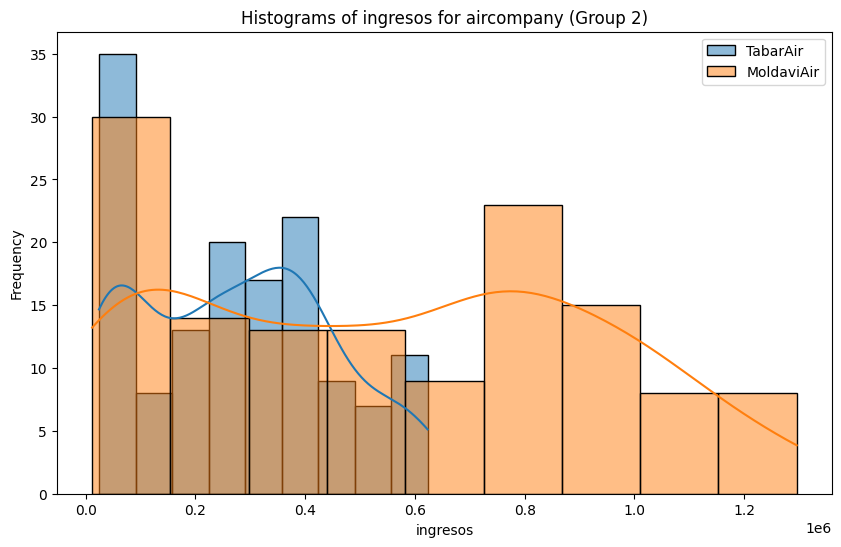

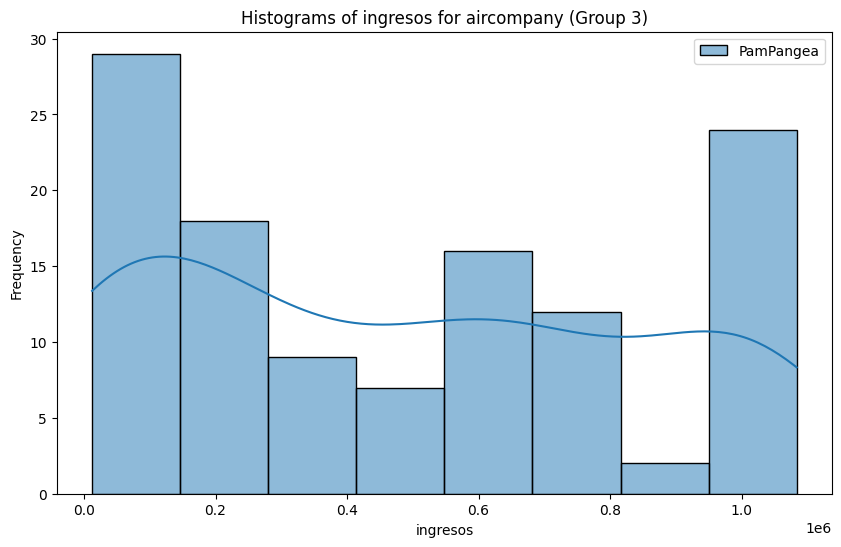

In [100]:
plot_grouped_histograms(df_air_jun, "aircompany","ingresos",group_size= 2)

En este caso la variable categórica no es binaria y no podemos usar la prueba U. Para estos casos empleamos el método ANOVA.

#### Aplicando ANOVA:

Nota: ANOVA es toda una metodología de análisis de varianza que entre otras cosas nos permite este "test" con categóricas y numéricas, tiene tambiéns sus suposiciones de partida que puede que no estemos cumpliendo (pero se escapa del ámbito del bootcamp cubrir este punto). Aquí encontrarás más información y detalle sobre el análsis de varianza: [Anova](https://datatab.es/tutorial/anova)

**#1 Importar librerias**

In [103]:
from scipy import stats

**#2 Separar en grupos según los valores de las categorías**

In [104]:
grupos = df_air_jun['aircompany'].unique()  # Obtener los valores únicos de la columna categórica, en este caso la compañía área
ingresos_por_company = [df_air_jun[df_air_jun['aircompany'] == grupo]['ingresos'] for grupo in grupos] # obtenemos los ingresos por compañía y los incluimos en una lista
ingresos_por_company

[0       14232.65
 9      110108.07
 17     518685.45
 21     799063.90
 23     432558.22
          ...    
 573    732878.07
 577    754191.00
 580    928050.52
 596     87307.63
 597    339943.47
 Name: ingresos, Length: 100, dtype: float64,
 1       468527.19
 33      273824.24
 36      235350.43
 40       25642.94
 41      417965.59
           ...    
 575     429377.42
 581    1004810.48
 589     398905.47
 590      31227.48
 598     752212.98
 Name: ingresos, Length: 108, dtype: float64,
 2      584789.19
 4      438535.07
 10     111056.67
 12     184079.01
 13      46200.30
          ...    
 572    258737.92
 582    423371.06
 587    404542.35
 593    550268.31
 599    330320.81
 Name: ingresos, Length: 142, dtype: float64,
 3       233342.51
 5       728045.68
 6        13805.52
 11      764998.83
 16      719577.55
           ...    
 578      12372.41
 579     409713.51
 583    1006880.11
 584      70674.57
 585     225493.20
 Name: ingresos, Length: 133, dtype: float64,
 7

**#3 Aplicamos el ANOVA**

In [105]:

f_val, p_val = stats.f_oneway(*ingresos_por_company) # El método * (igual que cuando vimos *args hace mil años) 
                                                    # lo que hace es separar todos los elementos de la lista y pasarselos como argumento a la función
print("Valor F:", f_val)
print("Valor p:", p_val)


Valor F: 15.68687291880937
Valor p: 3.267745855663723e-12


**#4 Interpretación del ANOVA**

En este caso la hipótesis nula vuelve a ser que las distribuciones de valores para cada compañía no tienen relación estadística, pero ahora como el p-value es menor que 0.05, rechazamos la hipótesis nula y reafirmamos la alternativa o contraria, es decir que sí que los ingresos no se parecen para cada compañía y que podemos extrapolar ese valor a otro conjuto de compañías con datos similares.

## RESUMEN PASOS ANALISIS BIVARIANTE

1. Establece una lista de combinaciones que quieras analizar sí o sí: Básate en las preguntas e hipótesis de partida que tengas, en la prioridad de las variables y en los resultados y notas de tu análisis univariante.
2. Aplica a cada combinación lo que has visto en el workout. Ahora ya empezarán a salir mensajes y conclusiones que sí pueden aparecer en el informe y presentación finales. Puede que surjan otras hipótesis y tengas que volver atrás.
    * Si tienes muestras y quieres extrapolar resultados, acuerdate de aplicar el contraste de hipótesis.
3. Haz una lista de preguntas que puedas responder ya y busca esa respuesta (ya no va de analizar sistemáticamente sino de filtrar, operar, agrupar los dataframes hasta que encuentres ese respuesta). Por ejemplo: No hace falta esperar para ver con más detalle qué ocurre con las ofertas de tipo 2 las que tenían más exito que el resto de ofertas.
4. Lánzate a analizar varias variables a la vez (más de 2) siempre guiado por las preguntas e hipótesis. 